## Movie Industry Exploratory Data Analysis

##### Objective : Analyze the movie industry to identify key factors that drive a film's success and provide actionable insights for companies aiming to enter or grow in the industry.

In [974]:
# Importing necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [975]:
# Load the dataset 
movie_dates_df = pd.read_csv('movie_release_dates.csv', index_col=0)
theaters_df = pd.read_csv('movie_theater_data.csv', index_col=0)
awards_df = pd.read_csv('movie_awards.csv', index_col=0)
actors_df = pd.read_csv('Actors_Table.csv')
directors_df = pd.read_csv('Directors_Table.csv')
imdb_base_df = pd.read_csv('IMDb_base.csv')
imdb_budgets_df = pd.read_csv('IMDb_budgets.csv')
studio_df = pd.read_csv('studiodf.csv')

In [976]:
#Setting the default style for plots
plt.style.use('ggplot')

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (12,8)

%matplotlib inline

### Data Preview

In [977]:
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.30,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [978]:
movie_dates_df.head()

,movie,release_date,release_month,release_day,release_year
0,Metropolis,1927-03-06,March,Sunday,1927
1,"Dr. Mabuse, the Gambler",1927-08-08,August,Monday,1927
2,The Unknown,1927-06-03,June,Friday,1927
3,The Jazz Singer,1927-10-06,October,Thursday,1927
4,Chicago,1927-12-23,December,Friday,1927


In [979]:
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio
0,The Lion King,4802,2019,543638043,Disney
1,Avengers: Endgame,4662,2019,858373000,Disney
2,Spider-Man: Far from Home,4634,2019,390532085,Sony
3,Toy Story 4,4575,2019,434038008,Disney
4,It Chapter Two,4570,2019,211593228,Warner Bros.


In [980]:
actors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2797800564
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2797800564
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2797800564
4,Avatar,2009,Sam Worthington,"Dec 17, 2009",237000000,760507625,2788701337


In [981]:
directors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Joe Russo,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Anthony Russo,"Apr 23, 2019",400000000,858373000,2797800564
2,Avatar,2009,James Cameron,"Dec 17, 2009",237000000,760507625,2788701337
3,Black Panther,2018,Ryan Coogler,"Feb 13, 2018",200000000,700059566,1346103376
4,Avengers: Infinity War,2018,Joe Russo,"Apr 25, 2018",300000000,678815482,2048359754


In [982]:
imdb_base_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.90,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama"
2,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy"
3,Black Panther,2018,7.30,PG-13,134,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi"


In [983]:
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista,415000000.00,652000000,2010
1,Alice in Wonderland (2010),Buena Vista,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,Pixar/Dreamworks,238700000.00,513900000,2010


In [984]:
imdb_budgets_df = imdb_budgets_df[imdb_budgets_df['Domestic Gross'] !=0]

### Question 1: What are the most profitable movies, and what is the ideal budget range?
1. Calculate profit as: Worldwide Gross - Production Budget.
2. Add new columns for profit and profit margin.
3. Adjust both budget and profit for inflation (average rate 3.22%) to maintain consistency across different years.

In [985]:
imdb_budgets_df['Profit'] = imdb_budgets_df['Worldwide Gross'] - imdb_budgets_df['Production Budget']

imdb_budgets_df['Profit_Margin'] = (imdb_budgets_df['Worldwide Gross'] - 
                                    imdb_budgets_df['Production Budget'])/imdb_budgets_df['Worldwide Gross']

In [986]:
imdb_budgets_df['Adjusted_Budget'] = ((((2020-imdb_budgets_df['Year'])*.0322)+1)*
                                      imdb_budgets_df['Production Budget'])

#Suppressing Scienific Notation
pd.options.display.float_format = '{:.2f}'.format

imdb_budgets_df['Adjusted_Profit'] = (((2020-imdb_budgets_df['Year'])*.0322)+1)*imdb_budgets_df['Profit']
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16
1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57
2,Black Panther,2018,7.30,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.85,212880000.00,1219912433.41
3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16
4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34


In [987]:
# Createing a new DataFrame with only profitable movies and sorting by Adjusted Profit
profitable_movies_df = imdb_budgets_df.loc[imdb_budgets_df['Profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True) #Modify the DataFrame in place (do not create a new object).
profitable_ranked_df.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34
1,1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57
2,0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16
3,3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16
4,28,Jurassic Park,1993,8.10,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1045627627,982627627,0.94,117772200.00,1836924085.91


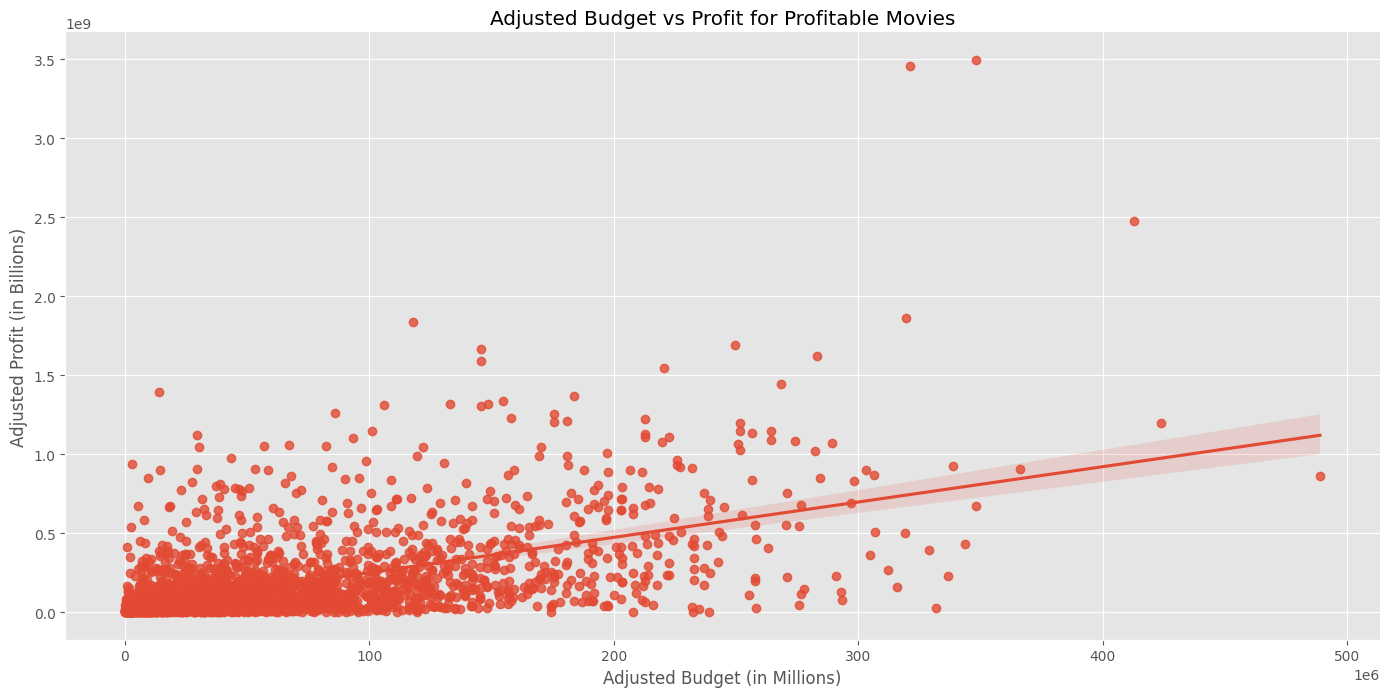

In [988]:
# Visualizing the relationship between Adjusted Budget and Adjusted Profit for profitable movies
ax1 = sns.lmplot(
    x='Adjusted_Budget',
    y='Adjusted_Profit',
    data=profitable_ranked_df,
    height=7,
    aspect=2
)

# Set axis labels and title
plt.xlabel('Adjusted Budget (in Millions)')
plt.ylabel('Adjusted Profit (in Billions)')
plt.title('Adjusted Budget vs Profit for Profitable Movies')

# Format x-axis to use scientific notation for large values
plt.ticklabel_format(axis='x', style='sci', scilimits=(6, 6))

# Save the plot
plt.savefig('Budget_vs_Profit', dpi=300)

The plot shows a positive correlation between budget and profit. The positive trend line indicates that an increase in the budget will result in an increase in profit. Let’s explore the most successful movies to determine ideal budget ranges

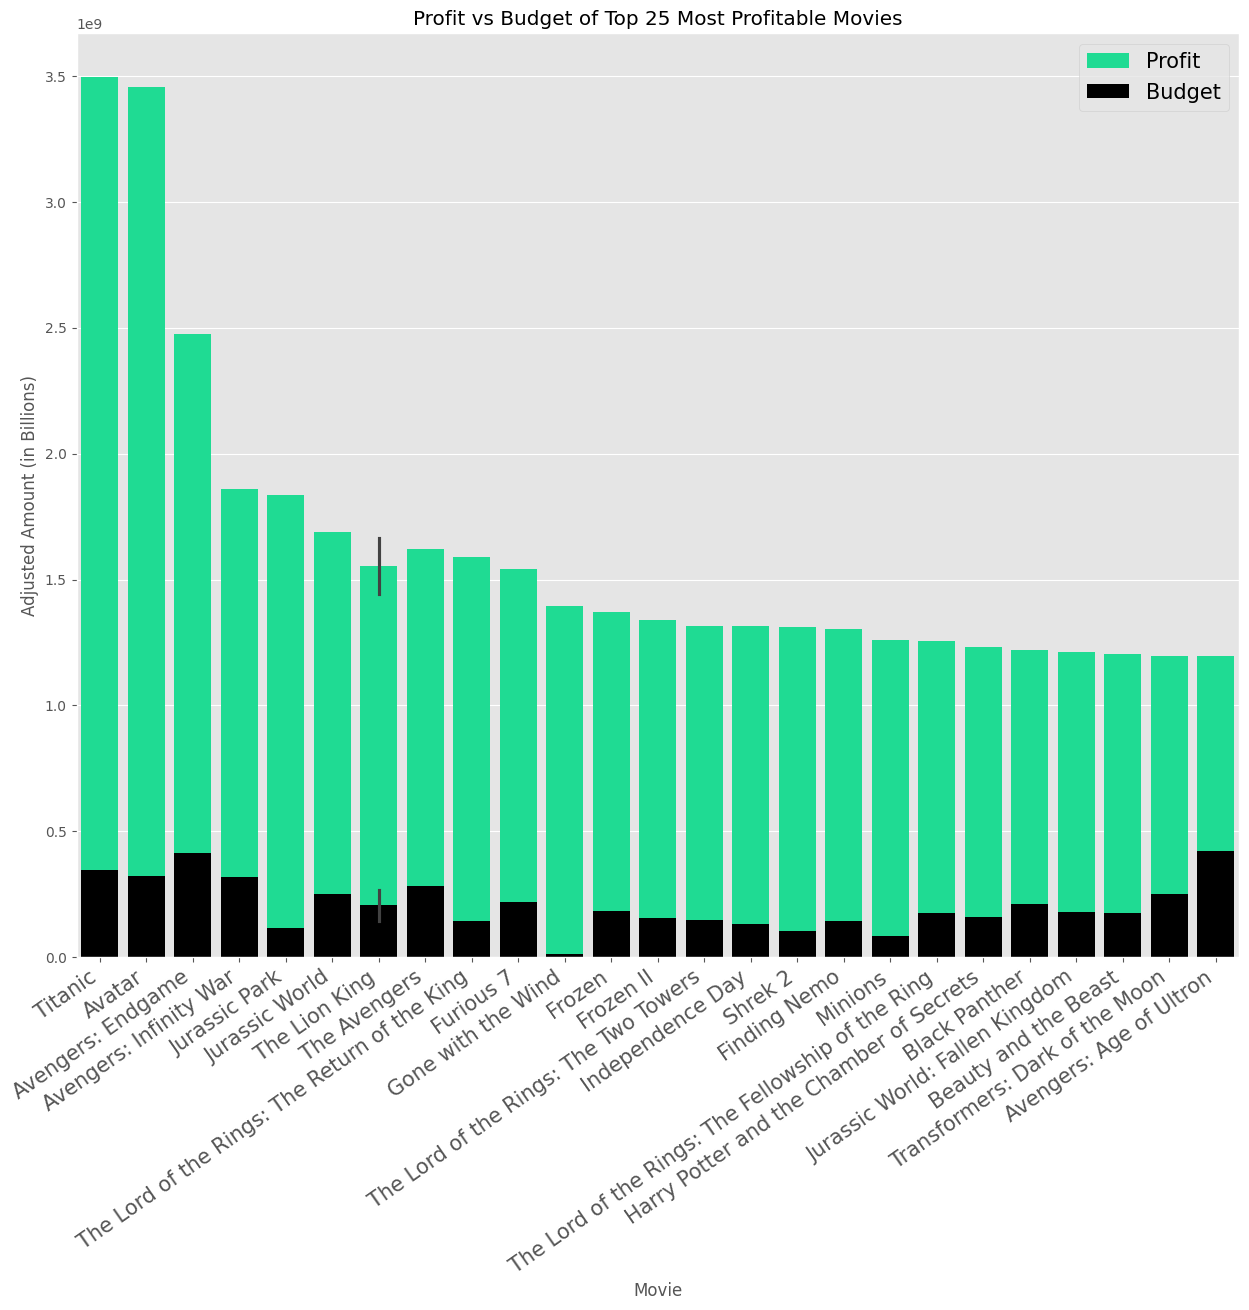

In [989]:
# Bar plot comparing Adjusted Profit and Adjusted Budget for the 25 most profitable movies

plt.figure(figsize=(15, 12))

# Plot Adjusted Profit
sns.barplot(
    x=profitable_ranked_df.loc[0:25, 'Movie'],
    y=profitable_ranked_df.loc[0:25, 'Adjusted_Profit'],
    color='mediumspringgreen',
    label='Profit',
    
)

# Plot Adjusted Budget
sns.barplot(
    x=profitable_ranked_df.loc[0:25, 'Movie'],
    y=profitable_ranked_df.loc[0:25, 'Adjusted_Budget'],
    color='black',
    label='Budget',
    
)

# Labels and title
plt.xlabel('Movie',)
plt.ylabel('Adjusted Amount (in Billions)')
plt.title('Profit vs Budget of Top 25 Most Profitable Movies')

# X-axis formatting
plt.xticks(rotation=35, ha='right', fontsize=15)

# Legend
plt.legend(loc='best', fontsize=15)

# Save the plot
plt.savefig('Profit_vs_Budget_Top25', dpi=300)


In [990]:
profitable_movies_df['Adjusted_Budget'].describe()

count        2836.00
mean     60689139.20
std      63199464.86
min         10606.40
25%      16608850.00
50%      38684100.00
75%      82247150.00
max     488834200.00
Name: Adjusted_Budget, dtype: float64

In [991]:
profitable_movies_df.loc[0:24, 'Adjusted_Budget'].describe()

count          25.00
mean    242777774.40
std      80698866.89
min     106064000.00
25%     180635000.00
50%     225760000.00
75%     282960000.00
max     423765000.00
Name: Adjusted_Budget, dtype: float64

In [992]:
profitable_movies_df['Profit_Margin'].describe()

count   2836.00
mean       0.62
std        0.24
min        0.00
25%        0.47
50%        0.67
75%        0.81
max        1.00
Name: Profit_Margin, dtype: float64

In [993]:
profitable_movies_df.loc[0:24, 'Profit_Margin'].describe()

count   25.00
mean     0.85
std      0.05
min      0.74
25%      0.81
50%      0.85
75%      0.87
max      0.93
Name: Profit_Margin, dtype: float64

In [994]:
len(profitable_ranked_df.loc[profitable_ranked_df['Profit_Margin'] > 0.5])

2041

The top 25 most profitable movies demonstrate exceptionally high profits and strong profit margins. Films like Titanic (1997), Avatar, and Avengers: Endgame lead in total profit.

💡 How do we decide the right budget?
It depends on the desired profit margin:

2041 out of 2841 profitable movies achieved a profit margin over 50%, indicating that aiming for higher margins is reasonable.

The top 25 movies have a median profit margin of 85% with a median budget of $225.76M.

In comparison, the overall set of profitable movies has a median profit margin of 67% and a median budget of $38.68M.

Median is used instead of mean to avoid distortion from outliers.

🔍 Next Step:
Filter movies with:

Profit margin ≥ 75%

Budget > $38.68M

This helps focus on high-performing films with sustainable investment levels.

In [995]:
filtered_df = profitable_ranked_df.loc[(profitable_ranked_df['Profit_Margin'] >= 0.75) & 
                         (profitable_ranked_df['Adjusted_Budget'] > 38684100)]
len(filtered_df)

374

After filtering we still have 374 movies left upon which to draw conclusions.

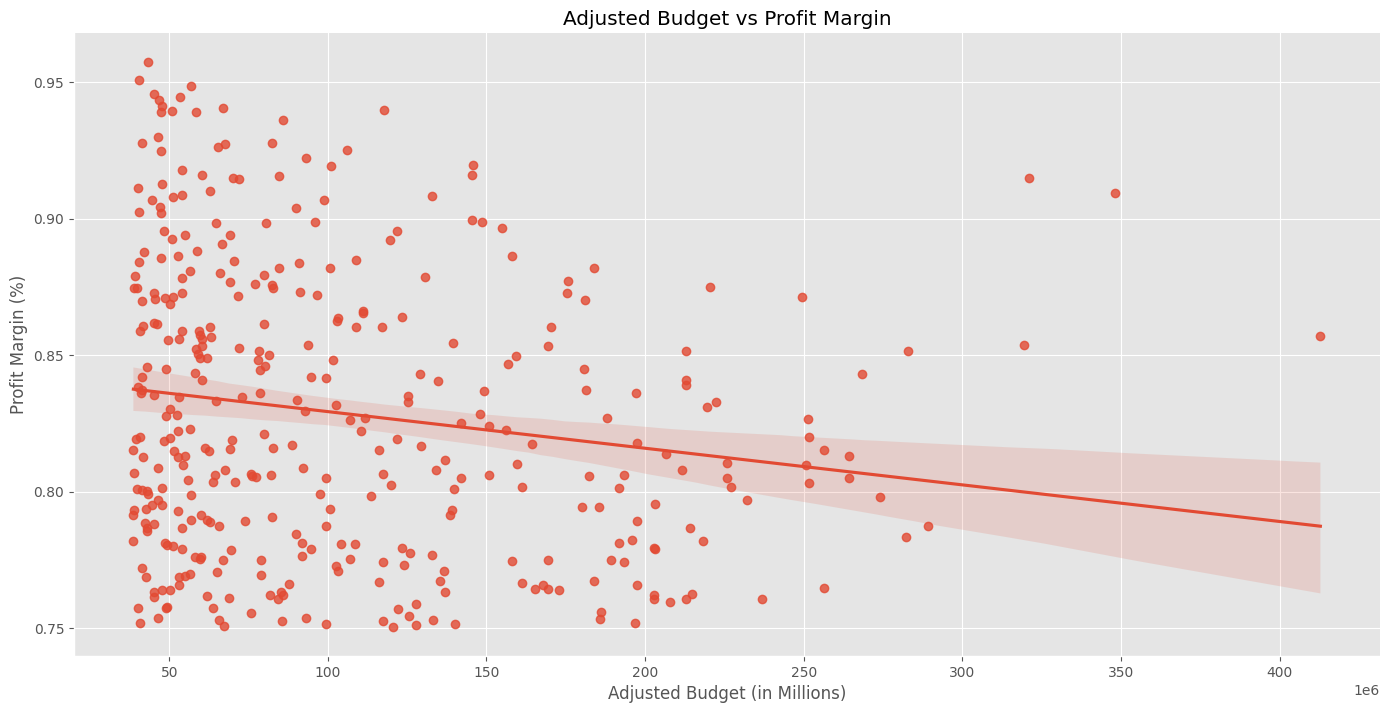

In [996]:
# Scatter plot with trend line showing the relationship between Adjusted Budget and Profit Margin

ax2 = sns.lmplot(
    x='Adjusted_Budget',
    y='Profit_Margin',
    data=filtered_df,
    height=7,
    aspect=2
)

# Set axis labels
plt.xlabel('Adjusted Budget (in Millions)')
plt.ylabel('Profit Margin (%)')

# Apply scientific notation formatting to x-axis if needed
plt.ticklabel_format(axis='x', style='sci', scilimits=(6, 6))

# Title
plt.title('Adjusted Budget vs Profit Margin')

# Save the plot
plt.savefig('Budget_vs_Margin', dpi=300)


In [997]:
filtered_df.describe()

,index,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,391.53,2004.97,7.01,118.60,77814178.13,193378841.67,484994903.63,407180725.50,0.83,105858522.51,562879114.94
std,378.20,10.81,0.90,24.02,57570152.51,127088965.57,377690264.14,329994078.69,0.05,66272237.80,413114307.71
min,0.00,1956.00,3.30,79.00,13500000.00,19019882.00,69995385.00,54995385.00,0.75,38685000.00,123209844.42
25%,111.25,1998.00,6.40,100.00,35000000.00,106948347.75,217288435.75,176354400.25,0.78,53471100.00,274861614.08
50%,279.50,2007.00,7.00,116.00,55000000.00,162801999.50,350937609.00,299062980.00,0.82,82249300.00,449229900.01
75%,550.50,2014.00,7.70,131.75,100000000.00,242081446.50,636084264.50,513979301.75,0.87,139654600.00,719591073.46
max,2424.00,2020.00,9.00,228.00,400000000.00,858373000.00,2797800564.00,2551701337.00,0.96,412880000.00,3495487532.34


We examine the data in a scatter plot again to see if we can determine trends. Our data is much more spread out when comparing profit margin and budget.  The trend line in this plot is negative which cautions against spending too much money as we may potentially hurt our profit margin.  Looking at the filtered data, we have a median budget of $82,249,300 and a median profit margin of 82%.  

**Question 1 Conclusion**: We recommend that our Company should budget approximately $82,250,000 to make a movie. This should correlate with a profit margin above 80%. 

### Question 2: Which movie genres are produced most often, and does higher production lead to higher profits?

In [998]:
# Split the 'Genre' column into individual genres per row

# Convert 'Genre' to string to avoid str accessor errors and split into lists
imdb_budgets_df['Genre'] = imdb_budgets_df['Genre'].astype(str).str.split(', ')

# Explode the list into separate rows
genre_budgets_df = imdb_budgets_df.explode('Genre').reset_index(drop=True)

# Remove any rows where 'Genre' is NaN or 'nan' as string
genre_budgets_df = genre_budgets_df[
    (genre_budgets_df['Genre'].notnull()) & 
    (genre_budgets_df['Genre'].str.lower() != 'nan')
]



In [999]:
# Count of all movies grouped by genre.
count_by_genre = genre_budgets_df.groupby('Genre', as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)

In [1000]:
count_by_genre

,Genre,Movie
6,Drama,1876
4,Comedy,1444
0,Action,1045
1,Adventure,834
5,Crime,689
15,Romance,622
18,Thriller,615
11,Horror,410
14,Mystery,356
16,Sci-Fi,330


C:\Users\kirtikumar\AppData\Local\Temp\ipykernel_12928\1544526877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x=count_by_genre['Movie'], y=count_by_genre['Genre'], palette='GnBu_d')


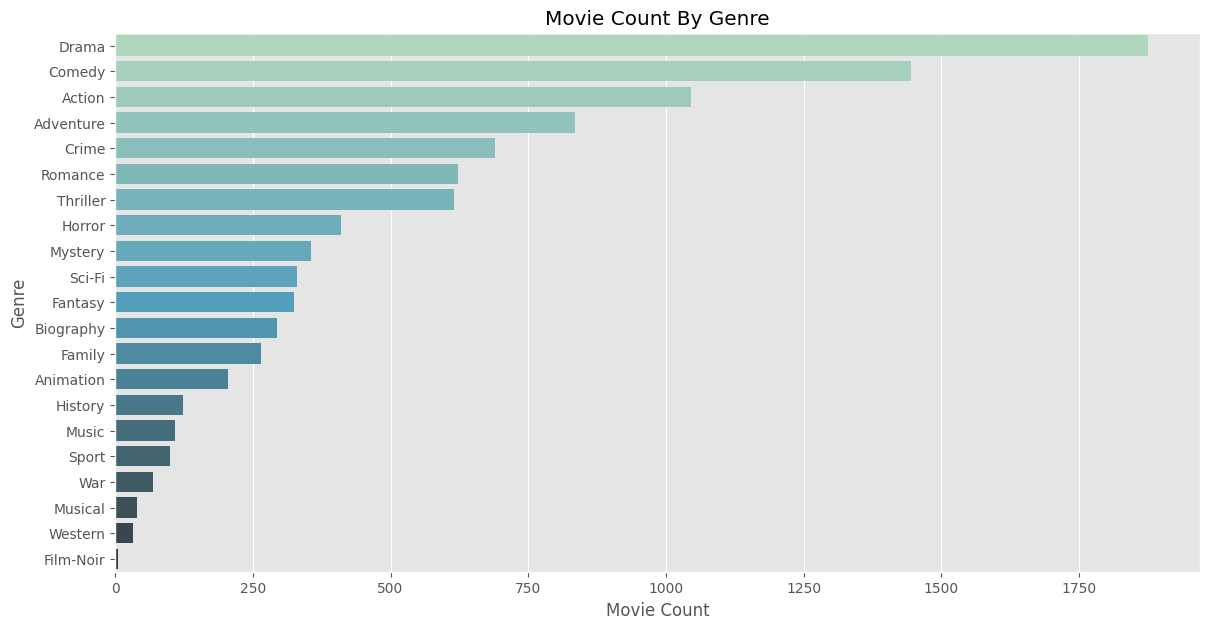

In [1001]:
# Visualizing the count of movies by genre using a bar plot

plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=count_by_genre['Movie'], y=count_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Movie Count')
plt.ylabel('Genre')
plt.title('Movie Count By Genre')
plt.savefig('CountGenre', dpi=300);

Drama, Comedy, and Action are the most frequently produced genres. However, does higher quantity translate to higher profitability?

To answer this, we'll group the data by genre and calculate the average net profit for each genre.

In [1002]:
#Once again group the movies by genre, showing the average net profit and profit margin for each.
profit_by_genre = genre_budgets_df.groupby('Genre', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)

profit_by_genre


,Genre,Adjusted_Profit,Profit_Margin
2,Animation,203606574.36,0.68
1,Adventure,123795016.96,0.61
16,Sci-Fi,76199115.79,0.60
7,Family,74621544.29,0.58
0,Action,64332532.19,0.52
8,Fantasy,54057582.24,0.54
18,Thriller,47338952.53,0.60
13,Musical,46631897.60,0.65
14,Mystery,39634323.82,0.61
11,Horror,38963349.12,0.67


C:\Users\kirtikumar\AppData\Local\Temp\ipykernel_12928\21215767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(x=profit_by_genre['Adjusted_Profit'], y=profit_by_genre['Genre'], palette='GnBu_d')


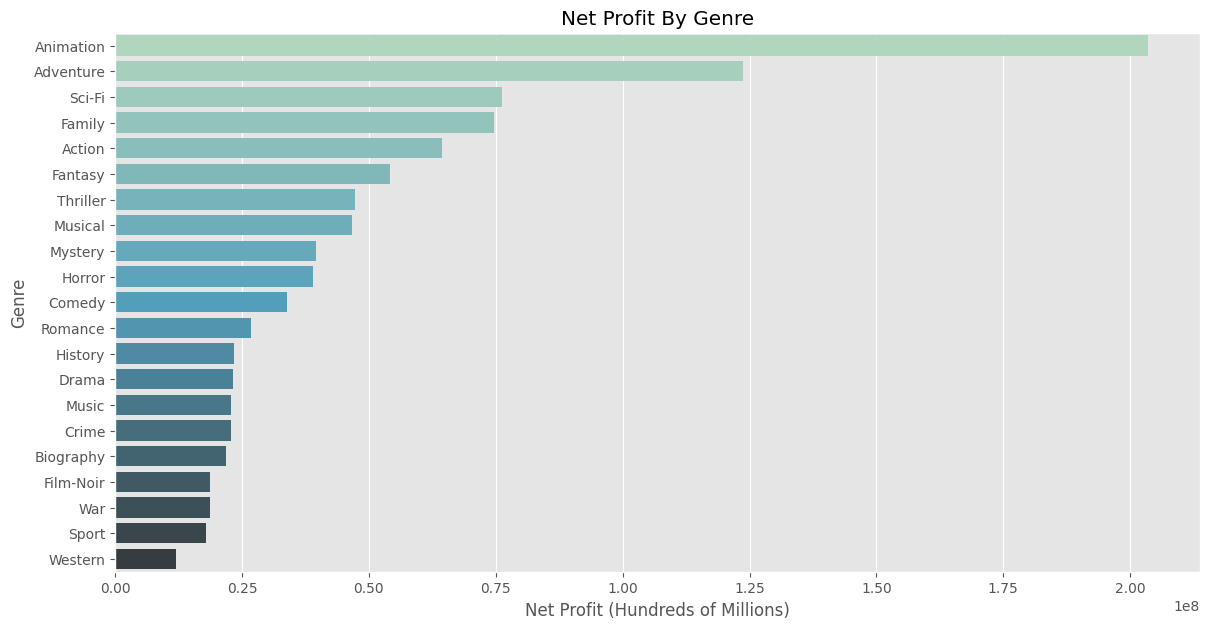

In [1003]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax4 = sns.barplot(x=profit_by_genre['Adjusted_Profit'], y=profit_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Net Profit (Hundreds of Millions)')
plt.ylabel('Genre')
plt.title('Net Profit By Genre')
plt.savefig('NetProfitGenre', dpi=300);

C:\Users\kirtikumar\AppData\Local\Temp\ipykernel_12928\1914503746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax5 = sns.barplot(x=profit_by_genre['Profit_Margin'], y=profit_by_genre['Genre'], palette='GnBu_d')


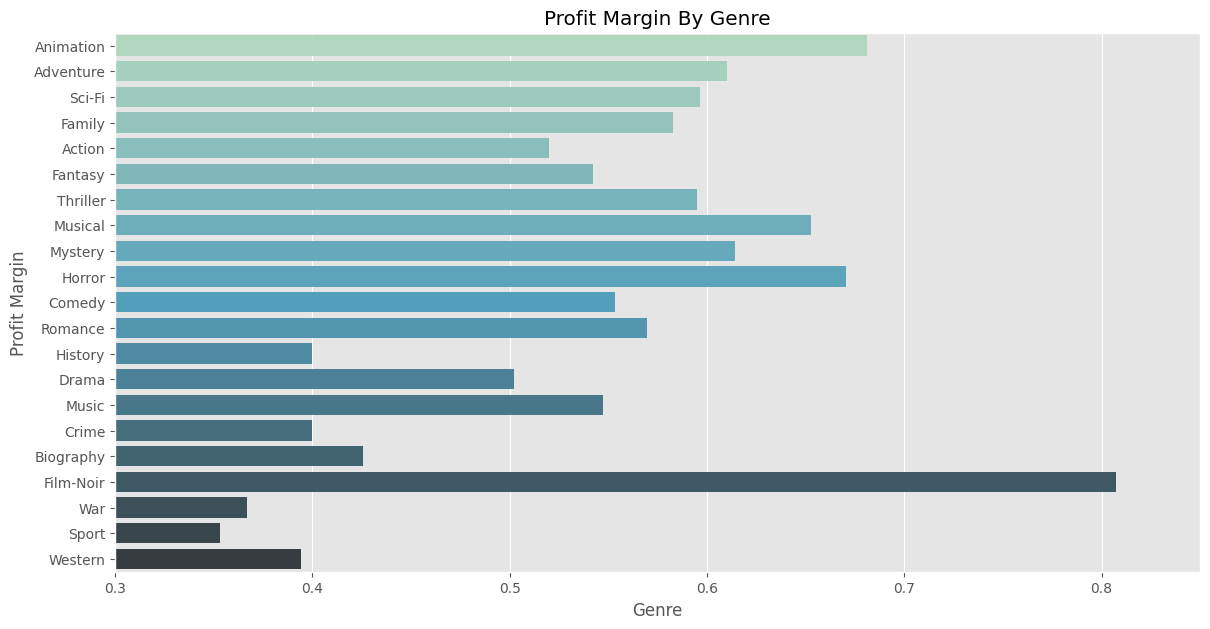

In [1004]:
plt.figure(figsize=(14,7))
ax5 = sns.barplot(x=profit_by_genre['Profit_Margin'], y=profit_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Genre')
plt.ylabel('Profit Margin')
plt.title('Profit Margin By Genre')
plt.xlim(0.3, 0.85)
plt.savefig('ProfitMarginGenre', dpi=300);

Interestingly, while Animation, Adventure, and Sci-Fi are not the most frequently produced genres, they lead in terms of median net profit. Animation also shows a strong profit margin, along with Horror and Musicals.

Note: Although Film Noir appears to have a profit margin exceeding 0.8, this is based on only 6 movies and should be disregarded due to the small sample size.

Finally, let’s analyze what percentage of the total net profit each genre contributes.

In [1005]:
#Grouped by genre, find the percent total of the net profit for each.
net_profit_by_genre = genre_budgets_df.groupby(['Genre'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
net_profit_by_genre['Percent Total of Net Profit'] = (net_profit_by_genre['Adjusted_Profit']/net_profit_by_genre['Adjusted_Profit'].sum()*100).round(2)
net_profit_by_genre

,Genre,Adjusted_Profit,Percent Total of Net Profit
1,Adventure,217335741708.40,18.07
0,Action,178930045524.32,14.88
4,Comedy,151922895671.69,12.63
6,Drama,144990041873.71,12.05
16,Sci-Fi,70465612908.78,5.86
2,Animation,68720987812.40,5.71
18,Thriller,65442236225.98,5.44
8,Fantasy,54797139085.80,4.56
15,Romance,50510744180.92,4.20
7,Family,46040638020.14,3.83


C:\Users\kirtikumar\AppData\Local\Temp\ipykernel_12928\4028456561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax6 = sns.barplot(x=net_profit_by_genre['Percent Total of Net Profit'], y=net_profit_by_genre['Genre'], palette='GnBu_d')


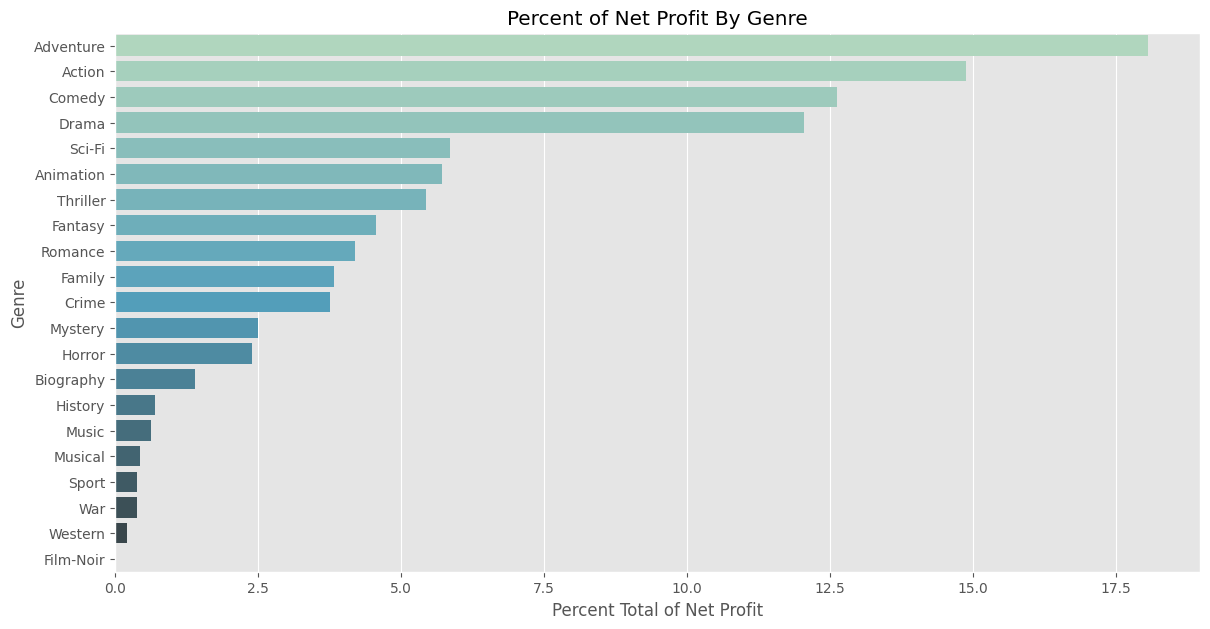

In [1006]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=net_profit_by_genre['Percent Total of Net Profit'], y=net_profit_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Percent Total of Net Profit')
plt.ylabel('Genre')
plt.title('Percent of Net Profit By Genre')
plt.savefig('PercentProfitGenre')

Adventure, Action, Comedy, and Drama currently account for the majority of the overall net profits across all movies. However, recent analysis highlights significant growth opportunities in the Animation and Sci-Fi genres, which demonstrate high average net profits combined with lower market saturation.

We will further analyze seasonal trends to understand which genres perform best during specific months.

Conclusion for Question 2:
We recommend that the company prioritize the top six most profitable genres: Adventure, Action, Comedy, Drama, Sci-Fi, and Animation. Additionally, we suggest placing strategic focus on Sci-Fi and Animation, as these genres present higher profit potential with relatively less competition.

### Question 3: What is the best time of the year to release a movie?

In [1007]:
imdb_budgets_df['Release Date'] = pd.to_datetime(imdb_budgets_df['Release Date'], errors='coerce')
imdb_budgets_df['Month'] = imdb_budgets_df['Release Date'].dt.month_name()


In [1008]:
#Count the total number of movies and group by month.
count_by_month = imdb_budgets_df.groupby(['Month'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
count_by_month

,Month,Movie
2,December,452
10,October,424
9,November,366
11,September,358
1,August,346
6,June,327
5,July,296
7,March,270
8,May,241
0,April,238


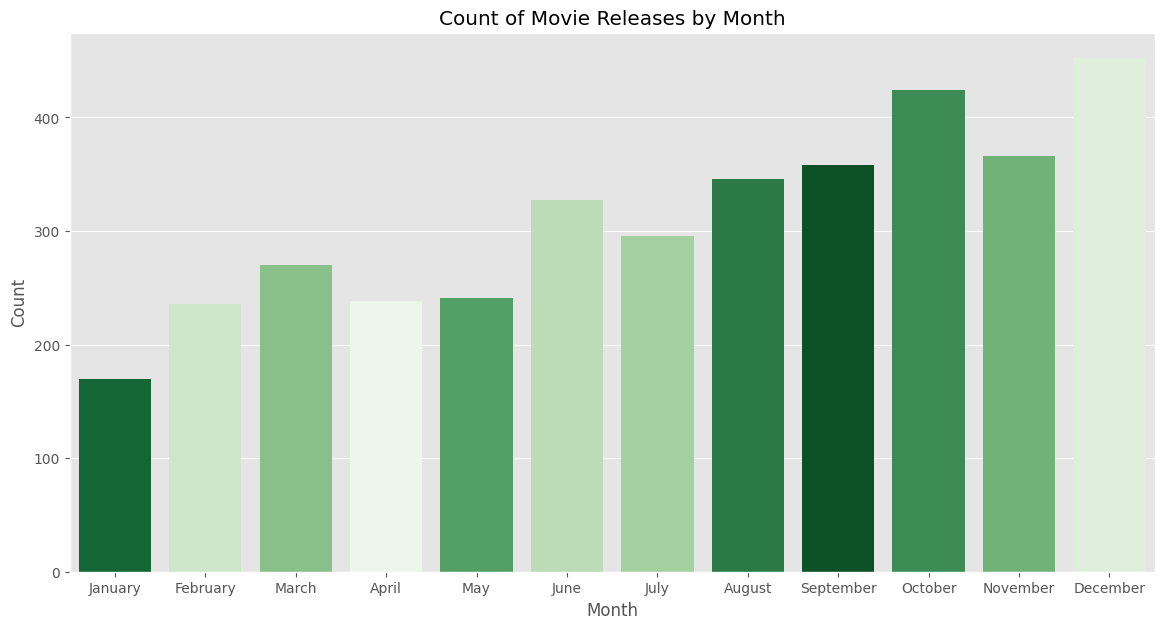

In [1009]:
plt.figure(figsize=(14,7))
ax7 = sns.countplot(
    x='Month',
    hue='Month',
    data=imdb_budgets_df,
    palette='Greens',
    order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December'],
    legend=False
)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Movie Releases by Month')
plt.savefig('CountbyMonth', dpi=300)
plt.show()


As you can see Decemeber and October lead the way in terms of sheer quantity of movies but does this suggest a higher level of profitability? Next we will look into the average net income by movie for each month.

In [1010]:
#Once again group the movies by month, showing the average net profit for each.
p_by_month = imdb_budgets_df.groupby('Month', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)
p_by_month

,Month,Adjusted_Profit,Profit_Margin
6,June,80327640.00,0.64
8,May,79372161.65,0.64
5,July,74716618.14,0.64
2,December,56823086.46,0.59
9,November,47476647.51,0.57
3,February,41089454.38,0.56
4,January,36807965.88,0.55
7,March,33645813.78,0.51
0,April,31435638.57,0.54
1,August,25383311.33,0.52


C:\Users\kirtikumar\AppData\Local\Temp\ipykernel_12928\2054740018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax8 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Adjusted_Profit'], palette='Greens',


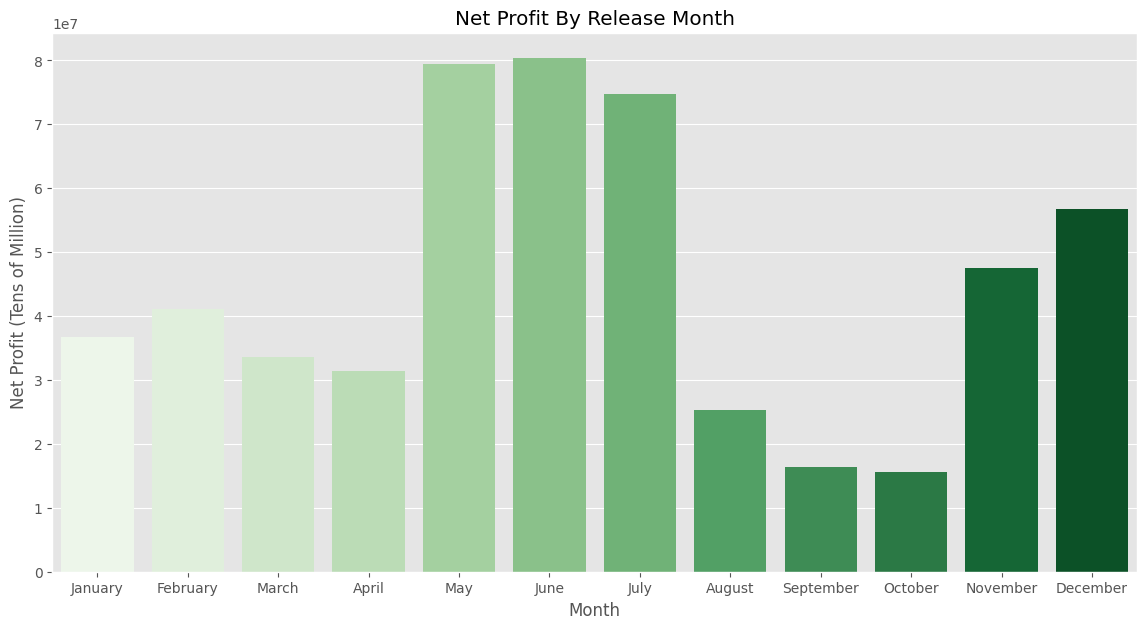

In [1011]:
#Plot your above findings in order by month.
plt.figure(figsize=(14,7))
ax8 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Adjusted_Profit'], palette='Greens', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month')
plt.ylabel('Net Profit (Tens of Million)')
plt.title('Net Profit By Release Month')
plt.savefig('ProfitbyMonth', dpi=300);

C:\Users\kirtikumar\AppData\Local\Temp\ipykernel_12928\2385184996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax9 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Profit_Margin'], palette='Greens',


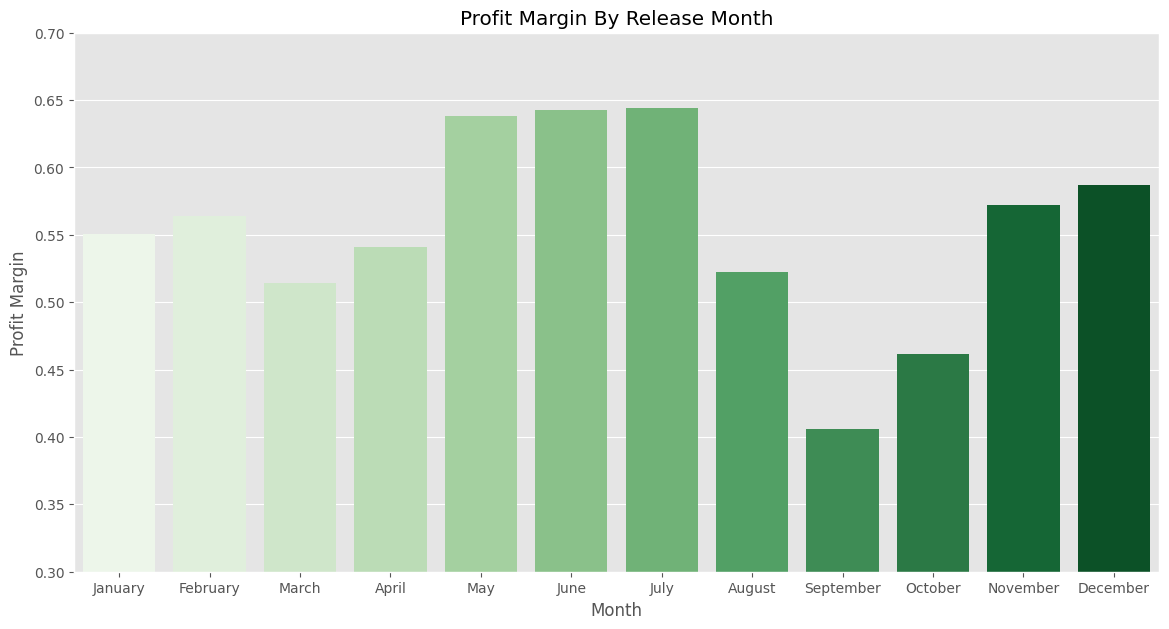

In [1012]:
plt.figure(figsize=(14,7))
ax9 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Profit_Margin'], palette='Greens', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month')
plt.ylabel('Profit Margin')
plt.title('Profit Margin By Release Month')
plt.ylim(0.3, 0.7)
plt.savefig('MarginByMonth', dpi=300);

Interestingly, May, June and July shoot to the top in terms of both median net profit and profit margin. It appears that the summer months tend to result in greater success, perhaps as a result of an influx of children and their parents during summer break. Now as previously mentioned, let's dig a little further and see which genre tends to do the best in which month.

In [1013]:
# Convert to datetime
genre_budgets_df['Release Date'] = pd.to_datetime(
    genre_budgets_df['Release Date'], 
    format='mixed',  # optional; remove if pandas < 2.0
    errors='coerce'
)

# Extract month name
genre_budgets_df['Month'] = genre_budgets_df['Release Date'].dt.month_name()

In [1014]:
#Create a new table called month_genre consisting of Genre, Month, Net Profit, and Release Date
month_genre = genre_budgets_df[['Genre', 'Month', 'Adjusted_Profit', 'Release Date']]
#Group by Genre and Month, displaying the average Net Profit for each combination.
month_genre = month_genre.groupby(['Genre', 'Month'], as_index=False)['Adjusted_Profit'].mean().sort_values(by='Adjusted_Profit', ascending=False)

In [1015]:
#Slice the top six most profitable genres from above.
Adventure_df = month_genre.loc[month_genre['Genre'].str.contains('Adventure')]
Action_df = month_genre.loc[month_genre['Genre'].str.contains('Action')]
Comedy_df = month_genre.loc[month_genre['Genre'].str.contains('Comedy')]
Drama_df = month_genre.loc[month_genre['Genre'].str.contains('Drama')]
Scifi_df = month_genre.loc[month_genre['Genre'].str.contains('Sci-Fi')]
Animation_df = month_genre.loc[month_genre['Genre'].str.contains('Animation')]

In [1016]:
#Concatenate the six new tables into one new table.
genre_concat = [Adventure_df, Action_df, Comedy_df, Drama_df, Scifi_df, Animation_df]
month_genre_df = pd.concat(genre_concat)

In [1017]:
#Create a table of the months in order.
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#Create a pivot table of month_genre_df, use the month_in_order table to reindex the pivot table.
month_genre_pivoted = month_genre_df.pivot(index='Month', columns='Genre', values='Adjusted_Profit').reindex(months_in_order)

In [1018]:
month_genre_pivoted

Genre,Action,Adventure,Animation,Comedy,Drama,Sci-Fi
Month,,,,,,
January,67911226.86,101480251.68,254304586.21,70321717.64,43539017.01,86131136.28
February,107741220.58,149172991.22,273699863.40,78129901.96,63807537.49,123463145.04
March,127548996.11,200474749.59,240295152.35,81411129.63,52348133.09,171335731.24
April,259392394.58,371426341.09,135514583.52,50050513.61,77199294.63,400992743.36
May,300431780.23,376946029.72,587476204.76,187839907.64,96590740.22,381838680.03
June,265101499.32,392963586.66,587763663.68,175416615.42,112382070.55,366873462.47
July,257293527.76,280812330.30,325184250.83,140927144.14,119198995.62,262513716.23
August,78993517.46,81128041.19,108115881.94,52702618.10,65637106.34,80812011.13
September,52980175.19,93388465.69,153847514.52,53288686.20,40194497.00,110804792.63


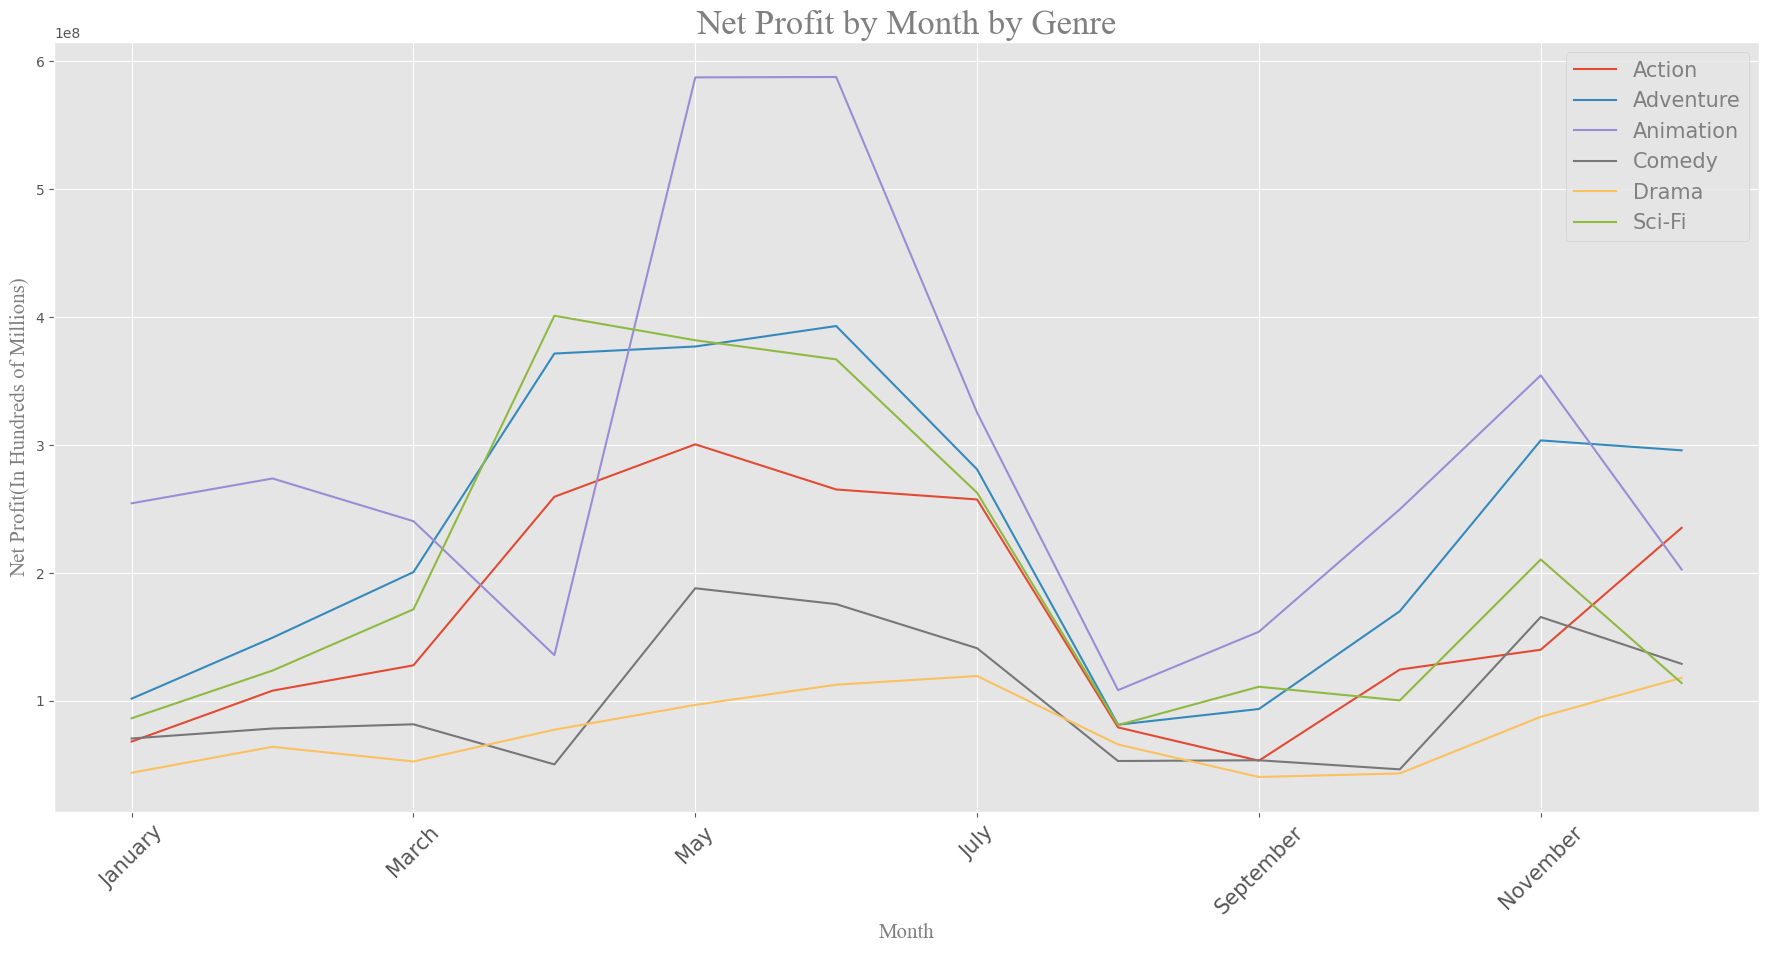

In [1019]:
#Visualize the top 6 most profitable genre's by month
ax10 = month_genre_pivoted.plot(kind='line', figsize=(22, 10), rot=0)
plt.legend(labelcolor='grey', loc='best', prop={'size': 15})
plt.xlabel('Month', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ylabel('Net Profit(In Hundreds of Millions)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Net Profit by Month by Genre', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyMonthbyGenre', dpi=300);

We can see that each genre follows the same basic pattern, with the summer months proving to be the most profitable time to release a movie. Some further analysis shows that releasing an animation movie in particular during the summer months will have the greatest potential for high net profits. On the other hand drama, although fluctuates slightly with the months, tends to have no impact based on release date. When considering what aspects go into creating a successful movie, it's clear that one must take take into account the impact of a well timed release date.

**Question 3 Conclusion**: We recommend that our Company release the bulk of their movies, especially Animation, during the summer months. Adventure, Drama and Comedy movies would see similar success if released in November, but the recommendation remains to focus on summer.

### Question 4: Now that we've got a better understanding of what attributes to a successful movie, which actors and directors tend to add the most value?

In [1020]:
#Similar to the imdb_budget_df table let's start by adjusting for inflation.
actors_df['Production Budget'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Production Budget']
actors_df['Worldwide Gross'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Worldwide Gross']
actors_df['Domestic Gross'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Domestic Gross']

In [1021]:
#Calculate Net Profit and Profit Margin
actors_df['Net Profit'] = actors_df['Worldwide Gross'] - actors_df['Production Budget']
actors_df['Profit Margin'] = actors_df['Net Profit'] / actors_df['Worldwide Gross']

In [1022]:
#Let's filter the actors_df table to only include actors that appeared in 10 or more movies
actor_counts = actors_df['value'].value_counts()
actor_list = actor_counts[actor_counts >= 10].index.tolist()
actors_df = actors_df[actors_df['value'].isin(actor_list)]

In [1023]:
#Calculate VAR, which is the average Net Profit by actor divided by average Net Profit for all movies.
actor_total = actors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
actor_total['VAR'] = (actor_total['Net Profit']/actor_total['Net Profit'].mean())

In [1024]:
#Create new table consisting of top 25 actors by VAR.
top_actors = actor_total.head(25)
top_actors

,value,Net Profit,VAR
113,Ian McKellen,642641141.05,4.56
88,Emma Watson,594070330.59,4.22
48,Chris Hemsworth,550993070.74,3.91
47,Chris Evans,518397913.83,3.68
262,Robert Downey Jr.,484884995.15,3.44
82,Elijah Wood,468414890.65,3.33
227,Mike Myers,451615981.41,3.21
324,Zoe Saldana,418413981.69,2.97
205,Mark Ruffalo,418051684.80,2.97
166,Josh Hutcherson,389946768.85,2.77


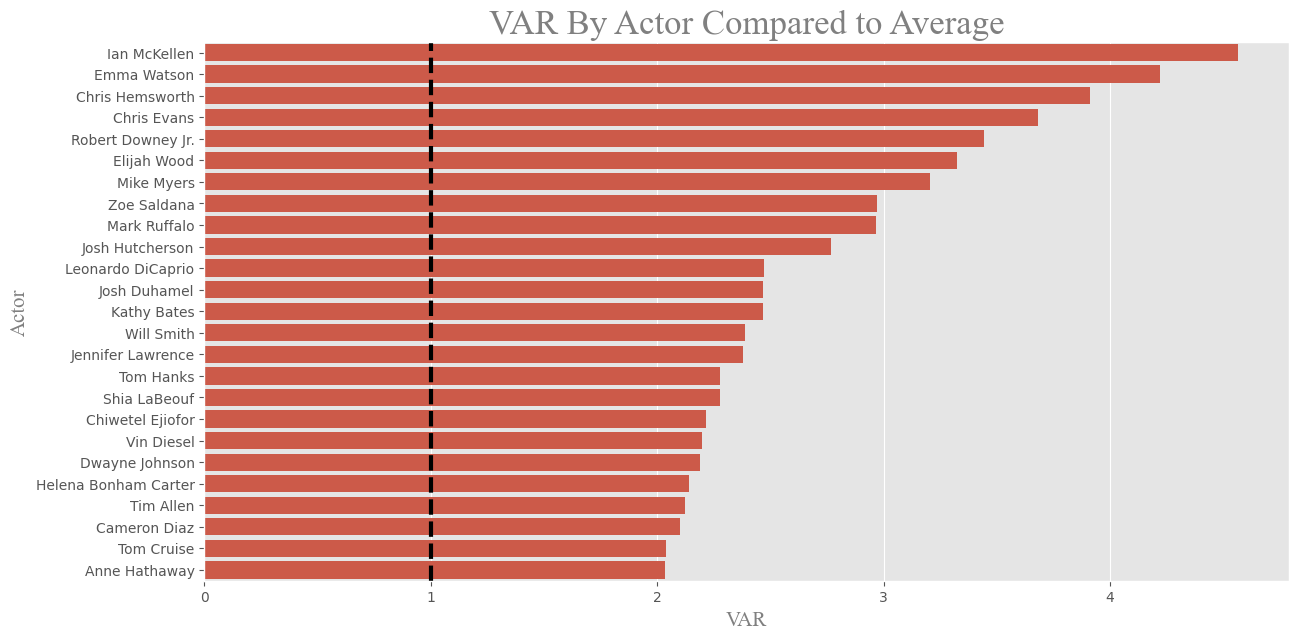

In [1025]:
#Plot above finding and label the average of 1 with a black line.
plt.figure(figsize=(14,7))
ax11 = sns.barplot(x=top_actors['VAR'], y=top_actors['value'])
plt.axvline(1, ls='--', color='black', linewidth=3)
plt.xlabel('VAR', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ylabel('Actor', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('VAR By Actor Compared to Average', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.savefig('VARActor', dpi=300);

Wow, from this list we can see that all of these actors consistently appear in very profitable movies; anywhere from two times the norm to four and a half times the norm. When casting a movie this is a good short-list from where to start making calls.

In [1026]:
#Adjust directors table for inflation.
directors_df['Production Budget'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Production Budget']
directors_df['Worldwide Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Worldwide Gross']
directors_df['Domestic Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Domestic Gross']

In [1027]:
#Calucalte Net Profit and Profit Margin.
directors_df['Net Profit'] = directors_df['Worldwide Gross'] - directors_df['Production Budget']
directors_df['Profit Margin'] = directors_df['Net Profit'] / directors_df['Worldwide Gross']

In [1028]:
#Let's filter the actors_df table to only include actors that appeared in 5 or more movies.
director_counts = directors_df['value'].value_counts()
director_list = director_counts[director_counts >= 5].index.tolist()
directors_df = directors_df[directors_df['value'].isin(director_list)]

In [1029]:
#Calculate VAR, which is the average Net Profit by director divided by average Net Profit for all movies.
director_total = directors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
director_total['VAR'] = (director_total['Net Profit']/actor_total['Net Profit'].mean())

In [1030]:
#Create new table consisting of top 25 directors by VAR.
top_directors = director_total.head(25)
top_directors

,value,Net Profit,VAR
78,James Cameron,1244750157.55,8.84
89,Joe Russo,1017389415.62,7.22
11,Anthony Russo,1017389415.62,7.22
115,Lee Unkrich,912067911.25,6.48
148,Peter Jackson,821878024.53,5.84
50,David Yates,688135205.04,4.89
104,Jon Favreau,628704113.52,4.46
129,Michael Bay,588804626.49,4.18
96,John Lasseter,577254528.66,4.10
31,Christopher Nolan,576508914.30,4.09


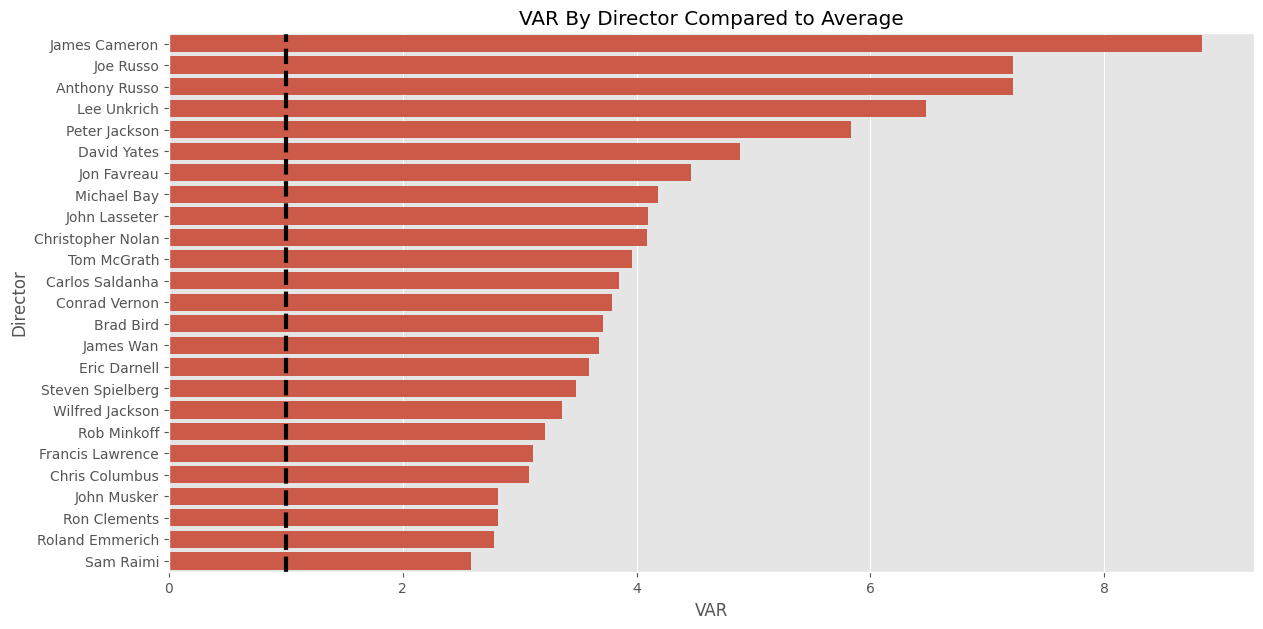

In [1031]:
#Plot above finding and label the average of 1 with a black line.
plt.figure(figsize=(14,7))
ax12 = sns.barplot(x=top_directors['VAR'], y=top_directors['value'])
plt.axvline(1, ls='--', color='black', linewidth=3)
plt.xlabel('VAR')
plt.ylabel('Director')
plt.title('VAR By Director Compared to Average')
plt.savefig('VARDirector', dpi=300);

It appears that the most significant value added comes from the directors chair. James Cameron movies on average make almost nine times the amount of the average movie, this emphasizes what great leadership represents on a set. If we wanted to further investigate which actors and directors make the most impact it would be important to determine which genre of movies they appear in most.

**Question 4 Conclusion**: We recommend that our Comapany focus their cast and crew search to individuals who consistently score at least 1.0 on the VAR score. We can, with a high level of confidence, conclude that these individuals will elevate the overall production.

### Question 5: How much should you spend on a movie to win an Oscar?

In order to answer this question we'll first need to join the `imdb_budgets_df` dataframe and the `awards_df` dataframe.  As there may be movies with duplicate titles, we set the indices of both dataframes to the movie name and year so that matching data is correctly joined.

In [1032]:
imdb_budgets_df.set_index(['Movie','Year'], inplace=True)
awards_df.set_index(['film_name', 'film_year'], inplace=True)

In [1033]:
# Joining the imdb_budgets_df and awards_df dataframes on Movie and Year
budgets_and_awards = imdb_budgets_df.join(awards_df, how='inner', on=['Movie', 'Year'])
budgets_and_awards.head()

,,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month,awards_won,awards_nominated,win_rate
Movie,Year,,,,,,,,,,,,,,,,
Avatar,2009,7.80,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57,December,3,9,0.33
Black Panther,2018,7.30,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.85,212880000.00,1219912433.41,February,3,7,0.43
Titanic,1997,7.80,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34,December,11,14,0.79
The Dark Knight,2008,9.00,PG-13,152,"[Action, Crime, Drama]",2008-07-11,185000000,533720947,1000742751,815742751,0.82,256484000.00,1130945749.99,July,2,8,0.25
Toy Story 4,2019,7.80,G,100,"[Animation, Adventure, Comedy]",2019-06-20,200000000,434038008,1073394813,873394813,0.81,206440000.00,901518125.98,June,1,2,0.50


In [1034]:
nominated_movies_df = budgets_and_awards.loc[budgets_and_awards['Profit'] > 0]

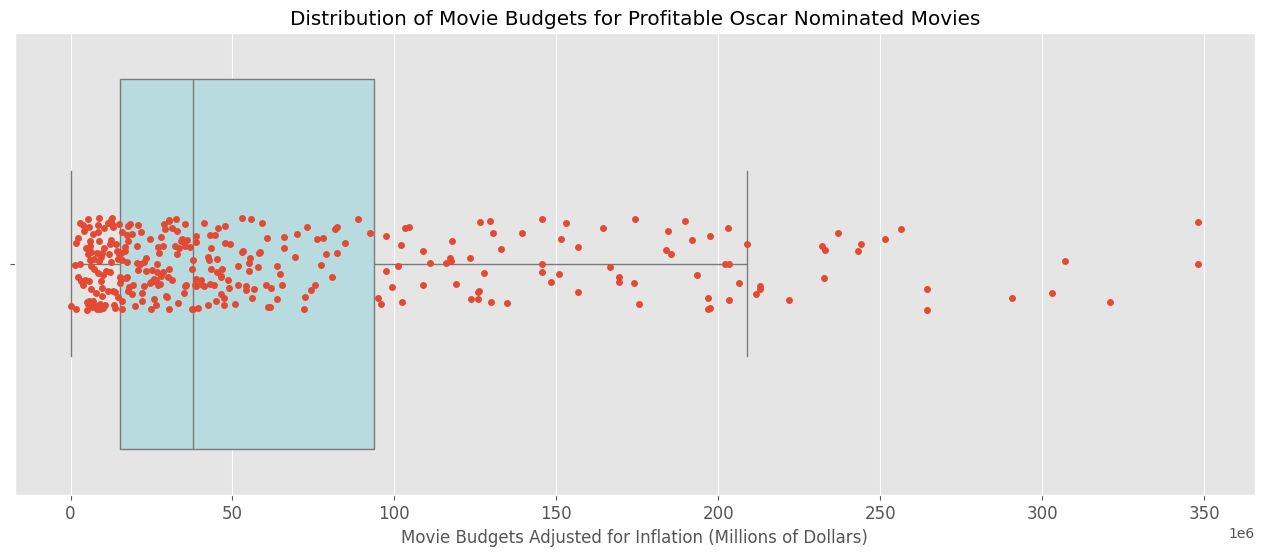

In [1035]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Adjusted_Budget', data=nominated_movies_df, showfliers=False, color='powderblue')
sns.stripplot(x='Adjusted_Budget', data=nominated_movies_df)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)')
plt.title('Distribution of Movie Budgets for Profitable Oscar Nominated Movies')
plt.savefig('Oscar_Nominated', dpi=300)

In [1036]:
nominated_movies_df['Adjusted_Budget'].describe()

count         331.00
mean     66479336.13
std      72497186.73
min        212790.00
25%      15425660.00
50%      37816500.00
75%      93598000.00
max     348300000.00
Name: Adjusted_Budget, dtype: float64

The distribution of movie budgets shows that most films cluster below $100 million.

To refine our analysis, we need to distinguish between movies that have won awards and those that haven’t. Simply filtering by win rate isn't sufficient because some movies win a single award from one nomination, resulting in a misleading win rate of 100%. This would introduce bias.

Therefore, before setting a threshold for awards, we will examine the mean and median win rates to determine an appropriate cutoff that balances between nominated and truly award-winning films

In [1037]:
nominated_movies_df['win_rate'].describe()
# Set a conservative threshold using the median win rate.
# This means a movie should have at least 3 nominations to reasonably expect winning 1 award.

count   330.00
mean      0.45
std       0.28
min       0.00
25%       0.25
50%       0.39
75%       0.60
max       1.00
Name: win_rate, dtype: float64

The mean win rate is 44.8% but as we mentioned is skewed by those movies with only 1 nomination. The median win rate is 39.2% which should be less skewed by the data and is a more conservative number. Using the median win rate of 39.2%, our movie would need to be nominated for at least 3 awards in order to get at least one win. 3 nominations will be the cutoff.

263


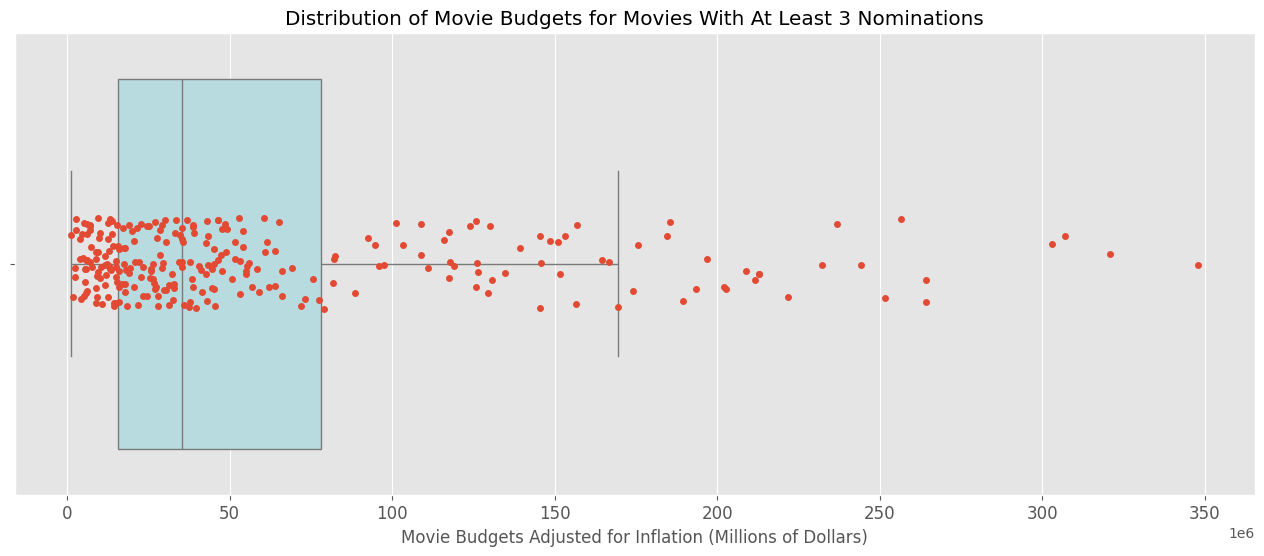

In [1038]:
nominated_over_three = nominated_movies_df.loc[nominated_movies_df['awards_nominated'] >= 3]
print(len(nominated_over_three))
plt.figure(figsize=(16,6))
sns.boxplot(x=nominated_over_three['Adjusted_Budget'], showfliers=False, color='powderblue')
sns.stripplot(x='Adjusted_Budget', data=nominated_over_three)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)')
plt.title('Distribution of Movie Budgets for Movies With At Least 3 Nominations')
plt.savefig('3_Nominations', dpi=300);

In [1039]:
nominated_over_three['Adjusted_Budget'].describe()

count         263.00
mean     62404651.14
std      69126844.12
min       1224990.00
25%      15482900.00
50%      35465000.00
75%      78132000.00
max     348120000.00
Name: Adjusted_Budget, dtype: float64

The box plot for the nominated_over_three dataset has visibly shrunk, indicating that our filter has reduced the interquartile range (IQR) for movie budgets. A smaller IQR means less variability in the middle 50% of the data. Given that some adjusted budgets are extreme outliers, the median is the most reliable measure of central tendency.

The median adjusted budget for movies with at least three nominations is $35,465,000.

**Question 5 Conclusion**: Our Company should spend at least $35,465,000 in order to make an Oscar-winning movie.

*It is also worth noting that the 75th percentile of the adjusted budget for movies with at least three nominations is $78,132,000. This is close to our recommendation of a \\$82 million budget for a profitable movie with a profit margin of approximately 80%.*

### Question 6: What impact, if any, does runtime and movie rating have on Net Profit, Profit Margin and IMDb rating?

Let's first start by analyzing the ratings. We want to include only movies rated G, PG, PG-13 or R.

In [1040]:
rating_counts = imdb_budgets_df['Rating'].value_counts()
rating_list = rating_counts[rating_counts >= 50].index.tolist()
rating_df = imdb_budgets_df[imdb_budgets_df['Rating'].isin(rating_list)]

In [1041]:
rating_df = rating_df.reset_index()
rating_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Avengers: Endgame,2019,8.40,PG-13,181,"[Action, Adventure, Drama]",2019-04-23,400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16,April
1,Avatar,2009,7.80,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57,December
2,Black Panther,2018,7.30,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.85,212880000.00,1219912433.41,February
3,Avengers: Infinity War,2018,8.40,PG-13,149,"[Action, Adventure, Sci-Fi]",2018-04-25,300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16,April
4,Titanic,1997,7.80,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34,December


In [1042]:
#Count the total number of movies and group by month.
rating_count = rating_df.groupby(['Rating'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
rating_count

,Rating,Movie
3,R,1631
2,PG-13,1339
1,PG,590
0,G,93


In [1043]:
#Group by Rating let's determine which has the highest median net profit and profit margin.
rating_df2 = rating_df.groupby(['Rating'], as_index=False)[['Adjusted_Profit', 'Profit_Margin', 'IMDb']].median().sort_values(by='Adjusted_Profit', ascending=False)
rating_df2

,Rating,Adjusted_Profit,Profit_Margin,IMDb
0,G,154376810.04,0.76,7.10
1,PG,75404192.25,0.62,6.50
2,PG-13,49565772.61,0.55,6.30
3,R,20402474.98,0.51,6.60


C:\Users\kirtikumar\AppData\Local\Temp\ipykernel_12928\2419067806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax13 = sns.boxplot( y=rating_df["Rating"], x=rating_df["Adjusted_Profit"], showfliers=False, palette='Blues')


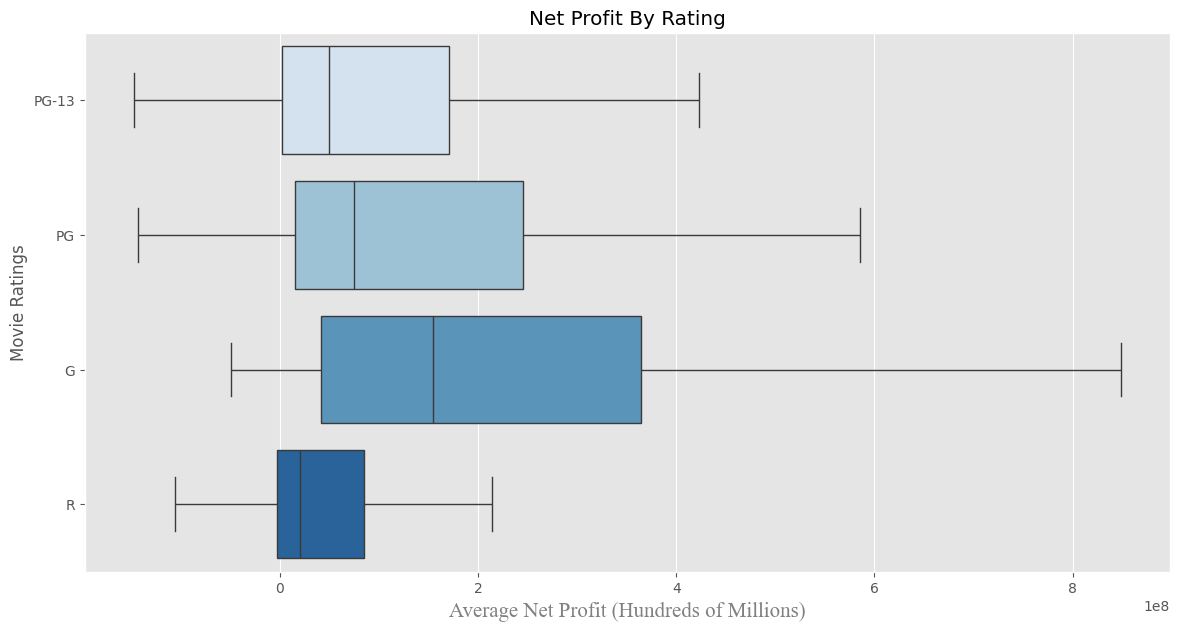

In [1044]:
# Plot your above findings
plt.figure(figsize=(14,7))
ax13 = sns.boxplot( y=rating_df["Rating"], x=rating_df["Adjusted_Profit"], showfliers=False, palette='Blues')
plt.xlabel('Average Net Profit (Hundreds of Millions)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ylabel('Movie Ratings')
plt.title('Net Profit By Rating' )
plt.savefig('ProfitbyRating', dpi=300);

G and PG-rated movies tend to deliver the highest net profits while representing the smallest share of the market. Similar to the Animation genre, this presents a valuable opportunity to enter a highly profitable space with less competition.

To further refine this insight, it would be useful to analyze total net profit broken down by both genre and rating to understand which combinations are the most successful.

In [1045]:
# First drop the rating column from genre_budgets_df and genre from rating_df
genre_rating_df = genre_budgets_df.drop(['Rating'], axis=1)
rating_df = rating_df.drop(['Genre'], axis=1)

In [1046]:
# Merge the genre_rating_df table and rating_df table
genre_rating_df = pd.merge(genre_rating_df, rating_df)

In [1047]:
#Slice the top six most profitable genres.
Adv_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Adventure')]
Act_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Action')]
Com_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Comedy')]
Dra_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Drama')]
Sci_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Sci-Fi')]
Ani_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Animation')]

genre_concat = [Adv_df, Act_df, Com_df, Dra_df, Sci_df, Ani_df]
genre_rating = pd.concat(genre_concat)

In [1048]:
# Create a pivot table from genre_rating
gr_df = genre_rating.groupby(['Genre', 'Rating'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
gr_pivoted = gr_df.pivot(index='Genre', columns='Rating', values='Adjusted_Profit')

In [1049]:
# Preview the table.
gr_pivoted

Rating,G,PG,PG-13,R
Genre,,,,
Action,433857722.52,24763000181.61,118481623908.94,34531361678.82
Adventure,17497561206.41,74634373302.77,114197905931.83,10663312187.82
Animation,20451774875.23,46792514260.78,682637577.33,120368587.97
Comedy,14989898831.46,61733858474.80,44722618139.99,30106719894.49
Drama,6452247472.37,19839992034.65,64718168260.81,50392310394.59
Sci-Fi,532343578.94,4649965463.02,54045363674.82,11072810424.26


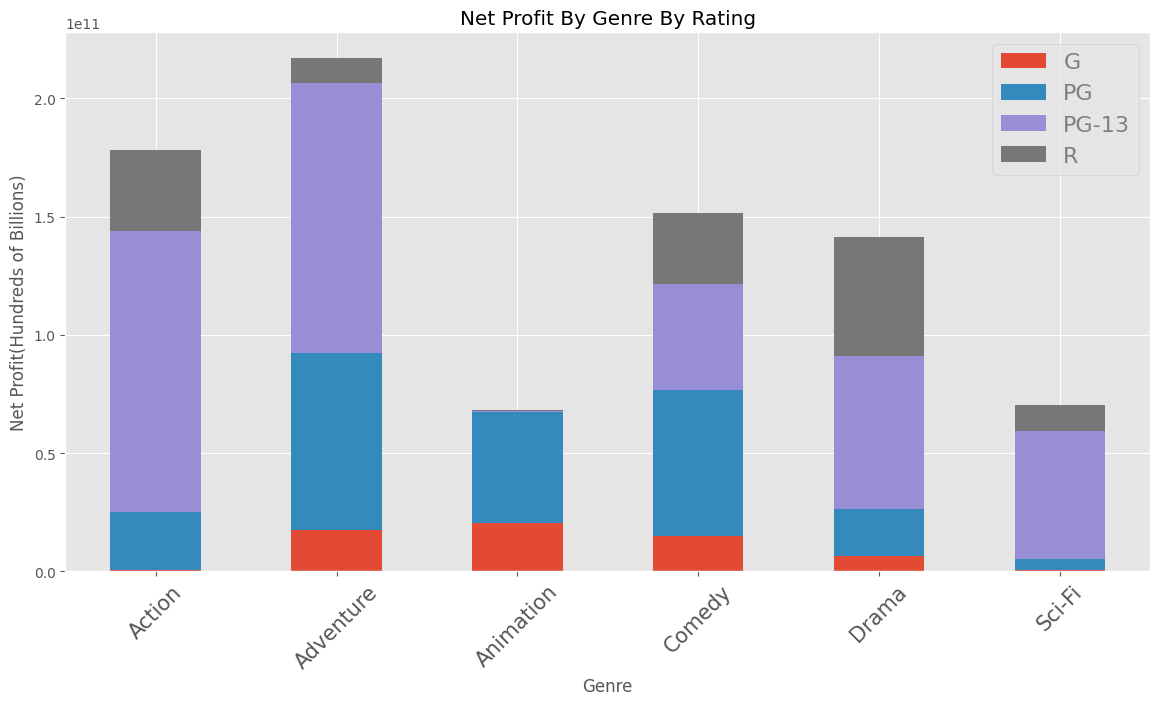

In [1050]:
# Plot the above findings.
ax14 = gr_pivoted.plot(kind='bar', stacked=True, figsize=(14,7))
plt.legend(labelcolor='grey', prop={'size': 16})
plt.xlabel('Genre' )
plt.ylabel('Net Profit(Hundreds of Billions)' )
plt.title('Net Profit By Genre By Rating' )
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyGenrebyRating');

As one could have probably guessed, animation is almost entirely made up of G and PG rated movies. We can see that for most other genres, the bulk of their total net profits come from PG-13 rated movies. From this we can focus on which rating to aim for in each genre to evoke the most success.

Now let's shift our focus to the film's runtime. Does movie length have an impact in terms of success?

In [1051]:
# Create a new table with runtime, net profit and profit margin.
runtime_df = imdb_budgets_df[['Runtime', 'Adjusted_Profit', 'Profit_Margin']]
runtime_df

,,Runtime,Adjusted_Profit,Profit_Margin
Movie,Year,,,
Avengers: Endgame,2019,181,2475009742.16,0.86
Avatar,2009,162,3455513950.57,0.92
Black Panther,2018,134,1219912433.41,0.85
Avengers: Infinity War,2018,149,1860954122.16,0.85
Titanic,1997,194,3495487532.34,0.91
...,...,...,...,...
The Misfits,1961,125,12179160.00,0.51
Judgment at Nuremberg,1961,179,20298600.00,0.70
The Wrong Man,1956,105,2448640.00,0.40


In [1052]:
# Let's start by taking a look at the correlation between runtime and net profit/profit margin.
pearsoncorr = runtime_df.corr(method='pearson')
pearsoncorr

,Runtime,Adjusted_Profit,Profit_Margin
Runtime,1.00,0.22,0.05
Adjusted_Profit,0.22,1.00,0.05
Profit_Margin,0.05,0.05,1.00


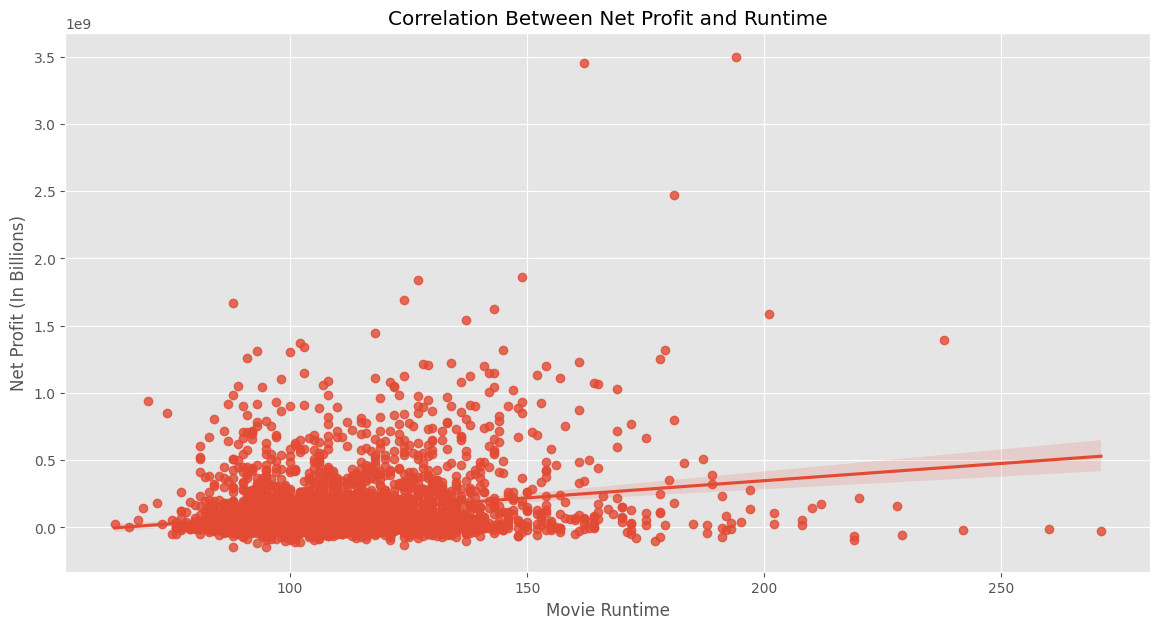

In [1053]:
# Plot the correlation.
plt.figure(figsize=(14,7))
ax15 = sns.regplot(x='Runtime', y='Adjusted_Profit', data=imdb_budgets_df)
plt.xlabel('Movie Runtime' )
plt.ylabel('Net Profit (In Billions)' )
plt.title('Correlation Between Net Profit and Runtime' )
plt.savefig('CorrProfitRuntime', dpi=300);

While there is a slight positive correlation (0.223) between movie runtime and net profit—indicating that longer movies tend to earn slightly more—the effect is very small and practically insignificant. This suggests that runtime is generally not a critical factor in determining profitability, and movies do not need to adhere to a specific length threshold.

**Question 6 Conclusion**:
Our company should prioritize choosing the right rating based on the genre and target audience.

For animated films, targeting a G or PG rating is optimal, aligning with higher profitability in that category.

For other genres, a PG-13 rating appears to be the most commercially successful balance.

Runtime has minimal impact on profitability, so creative decisions around length should be based on storytelling needs rather than financial outcomes

### Question 7: Sticking to our analysis of Net Profit and Profit Margin, what should our Company determine to be the baseline for sustainable success?

We have an understanding of what goes into a successful movie but let's determine what our Comapny should expect in terms of profitability if they expect to compete with the other top movie studios.

In [1054]:
# Merge studio_df and imdb_budgets_df
studiobudgets_df = pd.merge(studio_df, imdb_budgets_df, left_on = 'title', right_on='Movie') 
studiobudgets_df.head()

,title,studio,domestic_gross,foreign_gross,year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Toy Story 3,Buena Vista,415000000.00,652000000,2010,8.30,G,103,"[Animation, Adventure, Comedy]",2010-06-18,200000000,415004880,1068879522,868879522,0.81,264400000.00,1148658728.08,June
1,Inception,WB,292600000.00,535700000,2010,8.80,PG-13,148,"[Action, Adventure, Sci-Fi]",2010-07-16,160000000,292576195,832551961,672551961,0.81,211520000.00,889113692.44,July
2,Shrek Forever After,Pixar/Dreamworks,238700000.00,513900000,2010,6.30,PG,93,"[Animation, Adventure, Comedy]",2010-05-21,165000000,238736787,756244673,591244673,0.78,218130000.00,781625457.71,May
3,The Twilight Saga: Eclipse,Sumbadhat Productions,300500000.00,398000000,2010,5.00,PG-13,124,"[Adventure, Drama, Fantasy]",2010-06-30,68000000,300531751,706102828,638102828,0.90,89896000.00,843571938.62,June
4,Iron Man 2,Paramount,312400000.00,311500000,2010,7.00,PG-13,124,"[Action, Adventure, Sci-Fi]",2010-05-07,170000000,312433331,621156389,451156389,0.73,224740000.00,596428746.26,May


In [1055]:
# Let's remove some unnecessary fields.
studiobudgets_df.drop(columns = {'title', 'domestic_gross','Genre' ,'Month', 'Rating','Domestic Gross', 'foreign_gross', 'year', 'Production Budget', 'Worldwide Gross', 'Profit'}, inplace = True)
studiobudgets_df.rename(columns = {'studio':'Studio','Worldwide Gross ':'Worldwide Gross' }, inplace = True) 
studiobudgets_df.head()

,Studio,IMDb,Runtime,Release Date,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Buena Vista,8.30,103,2010-06-18,0.81,264400000.00,1148658728.08
1,WB,8.80,148,2010-07-16,0.81,211520000.00,889113692.44
2,Pixar/Dreamworks,6.30,93,2010-05-21,0.78,218130000.00,781625457.71
3,Sumbadhat Productions,5.00,124,2010-06-30,0.90,89896000.00,843571938.62
4,Paramount,7.00,124,2010-05-07,0.73,224740000.00,596428746.26


In [1056]:
studiobudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Studio           990 non-null    object        
 1   IMDb             990 non-null    float64       
 2   Runtime          990 non-null    int64         
 3   Release Date     990 non-null    datetime64[ns]
 4   Profit_Margin    990 non-null    float64       
 5   Adjusted_Budget  990 non-null    float64       
 6   Adjusted_Profit  990 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 54.3+ KB


In [1057]:
# Group by studio, find median and filter to top 25 by Adjusted Profit

profit_by_studiodf = studiobudgets_df.groupby('Studio').median()
profit_by_studiodf = profit_by_studiodf.reset_index()                                        
profit_by_studiodf = profit_by_studiodf.nlargest(25, 'Adjusted_Profit')
profit_by_studiodf

,Studio,IMDb,Runtime,Release Date,Profit_Margin,Adjusted_Budget,Adjusted_Profit
51,UTV,8.45,141.50,2018-05-12 12:00:00,0.96,33747300.00,692111186.04
37,Pixar/Dreamworks,6.70,94.00,2011-06-12 00:00:00,0.72,182352000.00,492119149.63
9,Buena Vista,7.10,117.00,2014-06-29 00:00:00,0.67,176565000.00,192853756.75
28,MBox,7.80,158.00,2011-12-20 00:00:00,0.62,116082000.00,192662546.51
48,Strand,6.50,112.00,2016-10-05 00:00:00,0.74,50796000.00,145929247.96
45,Sony,6.30,105.00,2013-10-11 00:00:00,0.66,65796000.00,129640066.99
35,Paramount,6.40,110.00,2014-03-27 00:00:00,0.64,53053600.00,127056224.44
20,Fox,6.35,106.00,2014-02-07 00:00:00,0.64,65785200.00,117180448.27
52,Universal,6.20,108.00,2014-10-01 00:00:00,0.69,47728000.00,108161868.36
54,WB,6.60,113.50,2014-06-07 12:00:00,0.54,66914000.00,80109060.57


In [1058]:
# Let's take a look at the average of these median values.
profit_by_studiodf.describe()

,IMDb,Runtime,Release Date,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,25.00,25.00,25,25.00,25.00,25.00
mean,6.77,112.18,2014-04-16 22:04:48,0.66,48838925.60,113427823.70
min,5.80,94.00,2011-02-25 00:00:00,0.45,2822000.00,15871420.39
25%,6.35,103.50,2013-03-02 12:00:00,0.60,21926600.00,33708922.03
50%,6.60,108.00,2014-03-27 00:00:00,0.66,33053600.00,50048659.51
75%,7.10,112.00,2014-10-01 00:00:00,0.72,53053600.00,127056224.44
max,8.45,160.00,2018-05-12 12:00:00,0.96,182352000.00,692111186.04
std,0.64,16.75,NaN,0.12,46124739.81,155771927.57


We can see that if we want to strive to be in the top half of this elite list of movie studios we need to have a profit margin of 66% and a net profit of 50 million per movie.

C:\Users\kirtikumar\AppData\Local\Temp\ipykernel_12928\2230390468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax16 = sns.barplot(x=profit_by_studiodf['Profit_Margin'], y=profit_by_studiodf['Studio'],


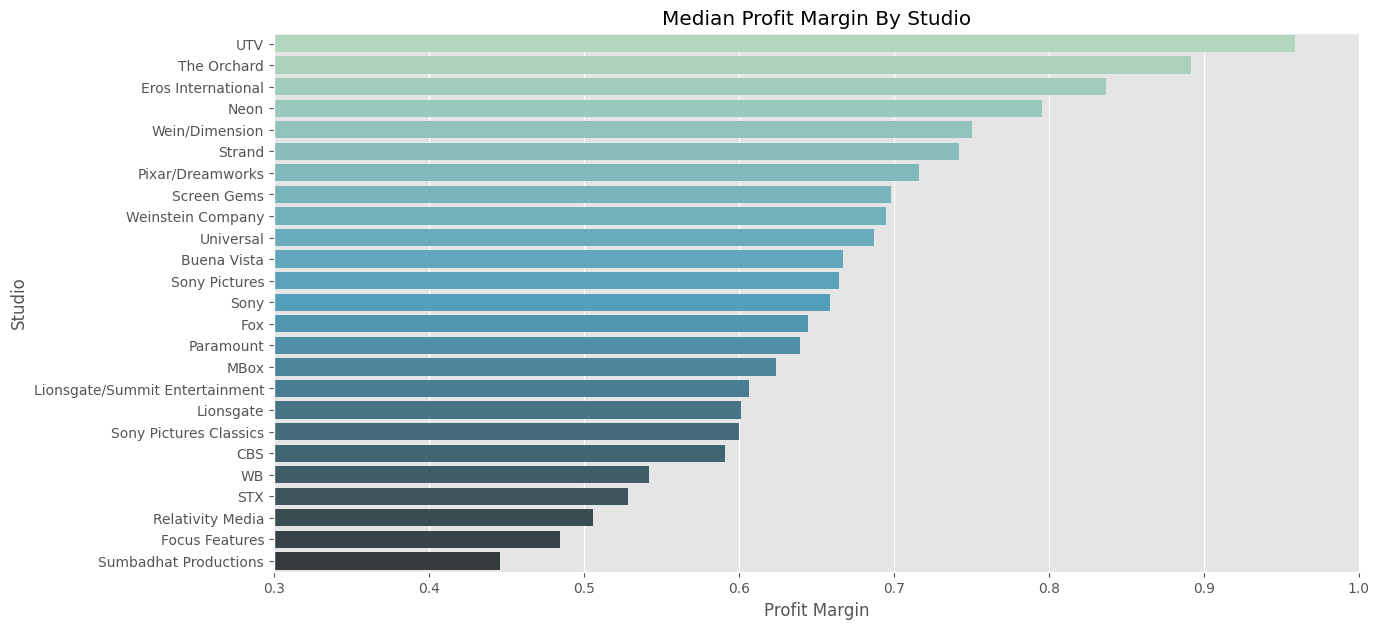

In [1059]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax16 = sns.barplot(x=profit_by_studiodf['Profit_Margin'], y=profit_by_studiodf['Studio'],
                   order=profit_by_studiodf.sort_values('Profit_Margin', ascending=False).Studio, palette='GnBu_d')
plt.xlabel('Profit Margin' )
plt.ylabel('Studio' )
plt.title('Median Profit Margin By Studio' )
plt.xlim(0.3, 1.0)
plt.savefig('ProfitMarginStudio')

C:\Users\kirtikumar\AppData\Local\Temp\ipykernel_12928\974915513.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax16 = sns.barplot(y=profit_by_studiodf['Studio'], x=profit_by_studiodf['Adjusted_Profit'], palette='GnBu_d')


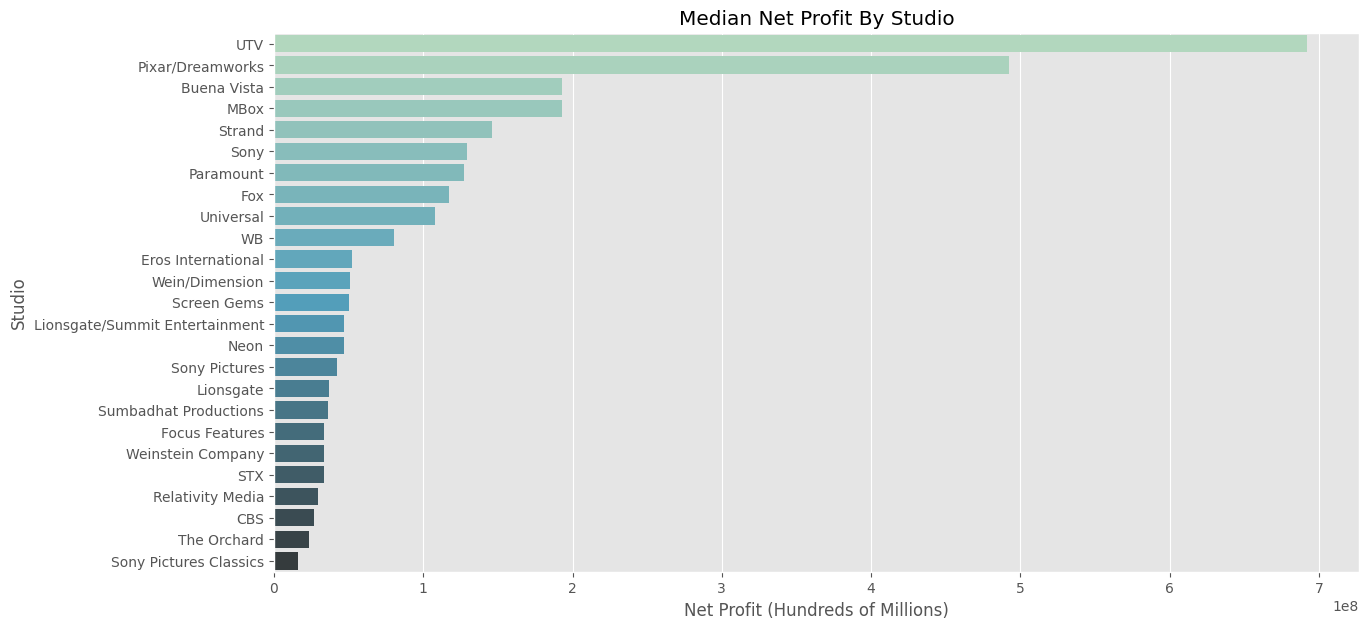

In [1060]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax16 = sns.barplot(y=profit_by_studiodf['Studio'], x=profit_by_studiodf['Adjusted_Profit'], palette='GnBu_d')
plt.xlabel('Net Profit (Hundreds of Millions)' )
plt.ylabel('Studio' )
plt.title('Median Net Profit By Studio' )
plt.savefig('NetProfitStudio');

We can see from the graph above that the major players in the studio industry have profit margins ranging from 24% to 95%. That's quite a large range to define success. However, the top 25 studios shown are many of the studios that we often recognize when we go to the movies. As we've done previously, we use the median profit margin of the top 25 as a target for success among major studios. That profit margin is 66%.
In the next analysis we'll take a closer look at some of these major studios to see what metrics we should try to mimic. Let's also keep this in mind as we go into our next analysis: UTV which has the greatest profit margin of all the studios is a subsidiary of Disney.

**Question 7 Conclusion**: Microsoft should aim for a profit margin of 66% and a net profit of slightly over 50 million per movie to compete with the top existing studios.

### Question 8: Based on the success of current competitors, which should we look to for best practices?

We need to add a column to the `theaters_df` dataframe to calculate the money grossed per theater for a given movie.  Then we can group by studio.

In [1061]:
theaters_df['dollars_per_theater'] = theaters_df['total_dom_gross($)'] / theaters_df['max_theaters']
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio,dollars_per_theater
0,The Lion King,4802,2019,543638043,Disney,113210.75
1,Avengers: Endgame,4662,2019,858373000,Disney,184121.19
2,Spider-Man: Far from Home,4634,2019,390532085,Sony,84275.37
3,Toy Story 4,4575,2019,434038008,Disney,94871.70
4,It Chapter Two,4570,2019,211593228,Warner Bros.,46300.49


In [1062]:
#Let's see what the average is for max number of theaters and for gross per theater for each studio
theaters_temp_df = theaters_df.drop(columns=['title'],axis=1)
average_theaters = theaters_temp_df.groupby('studio').mean()
average_theaters_ranked = average_theaters.sort_values(by=['studio'],ascending=False)
average_theaters_ranked.reset_index(inplace=True)
average_theaters
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio,dollars_per_theater
0,The Lion King,4802,2019,543638043,Disney,113210.75
1,Avengers: Endgame,4662,2019,858373000,Disney,184121.19
2,Spider-Man: Far from Home,4634,2019,390532085,Sony,84275.37
3,Toy Story 4,4575,2019,434038008,Disney,94871.70
4,It Chapter Two,4570,2019,211593228,Warner Bros.,46300.49


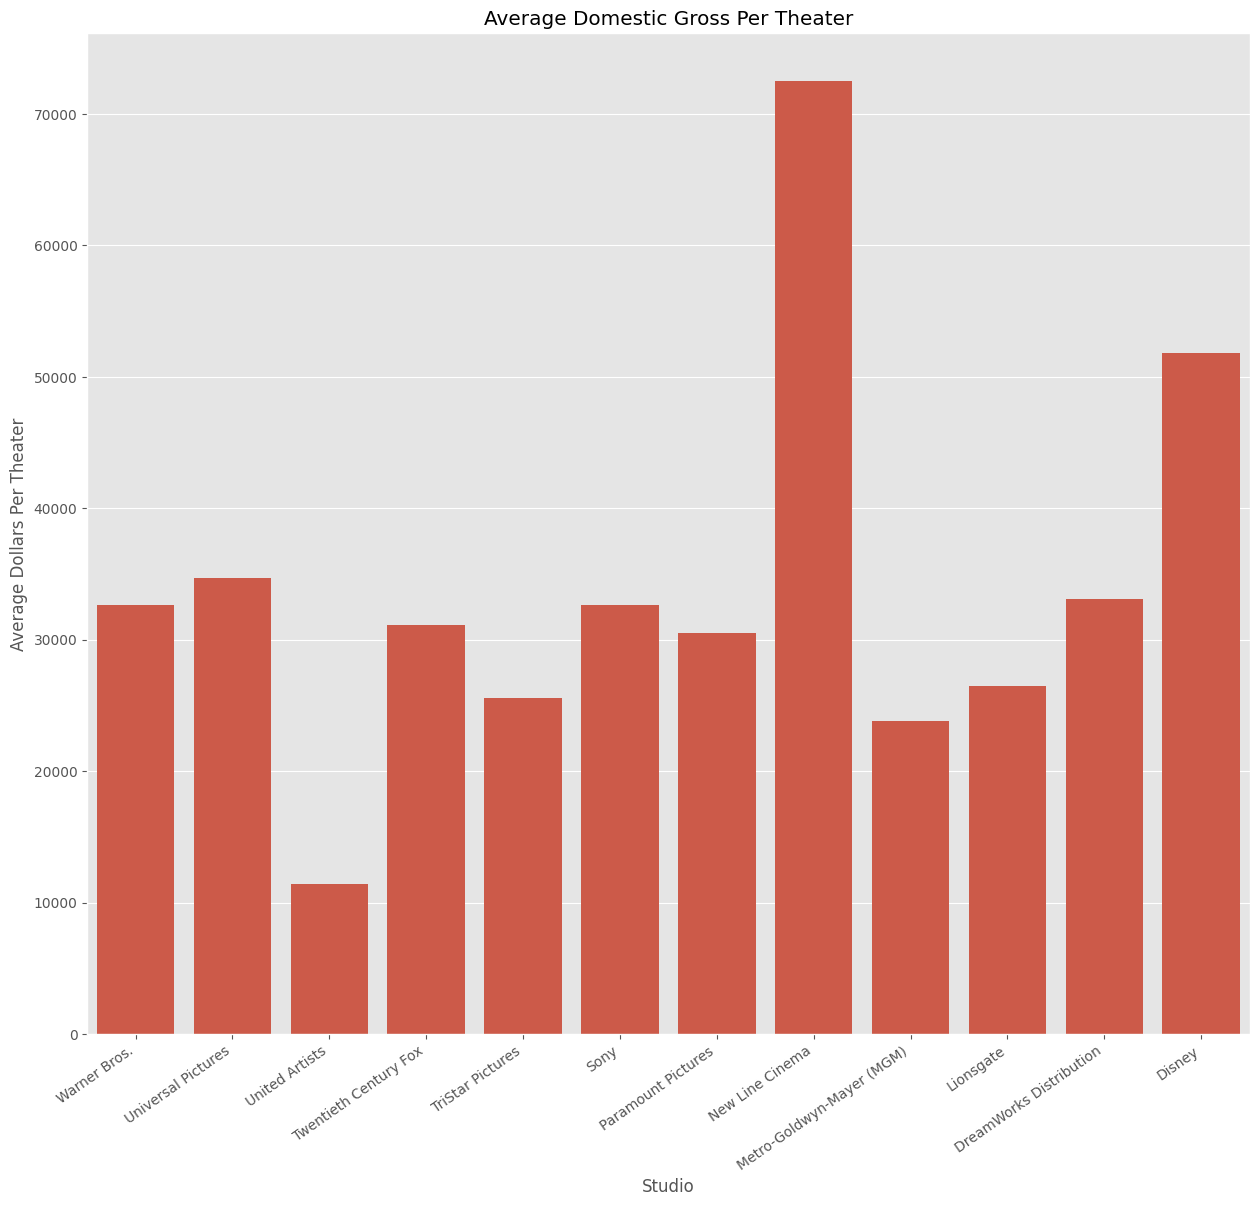

In [1063]:
plt.figure(figsize=(15,13))
ax16 = sns.barplot(x='studio', y='dollars_per_theater', data=average_theaters_ranked)
plt.xlabel('Studio' )
plt.title("Average Domestic Gross Per Theater" )
plt.ylabel('Average Dollars Per Theater' )
plt.xticks(rotation=35, horizontalalignment='right')
plt.savefig('DomesticPerTheater', dpi=300)

In the bar plot above, Disney and New Line Cinema stand out. We need to double check that there are an appropriate number of movies by each of these studios before jumping to conclusions.

In [1064]:
theaters_df['studio'].value_counts()
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio,dollars_per_theater
0,The Lion King,4802,2019,543638043,Disney,113210.75
1,Avengers: Endgame,4662,2019,858373000,Disney,184121.19
2,Spider-Man: Far from Home,4634,2019,390532085,Sony,84275.37
3,Toy Story 4,4575,2019,434038008,Disney,94871.70
4,It Chapter Two,4570,2019,211593228,Warner Bros.,46300.49


We can see that New Line Cinema only has 7 movies in this dataframe which means that their average domestic gross per theater is going to be skewed.  Disney is certainly still a possibility and we should also consider Warner Bros. and Twentieth Century Fox.

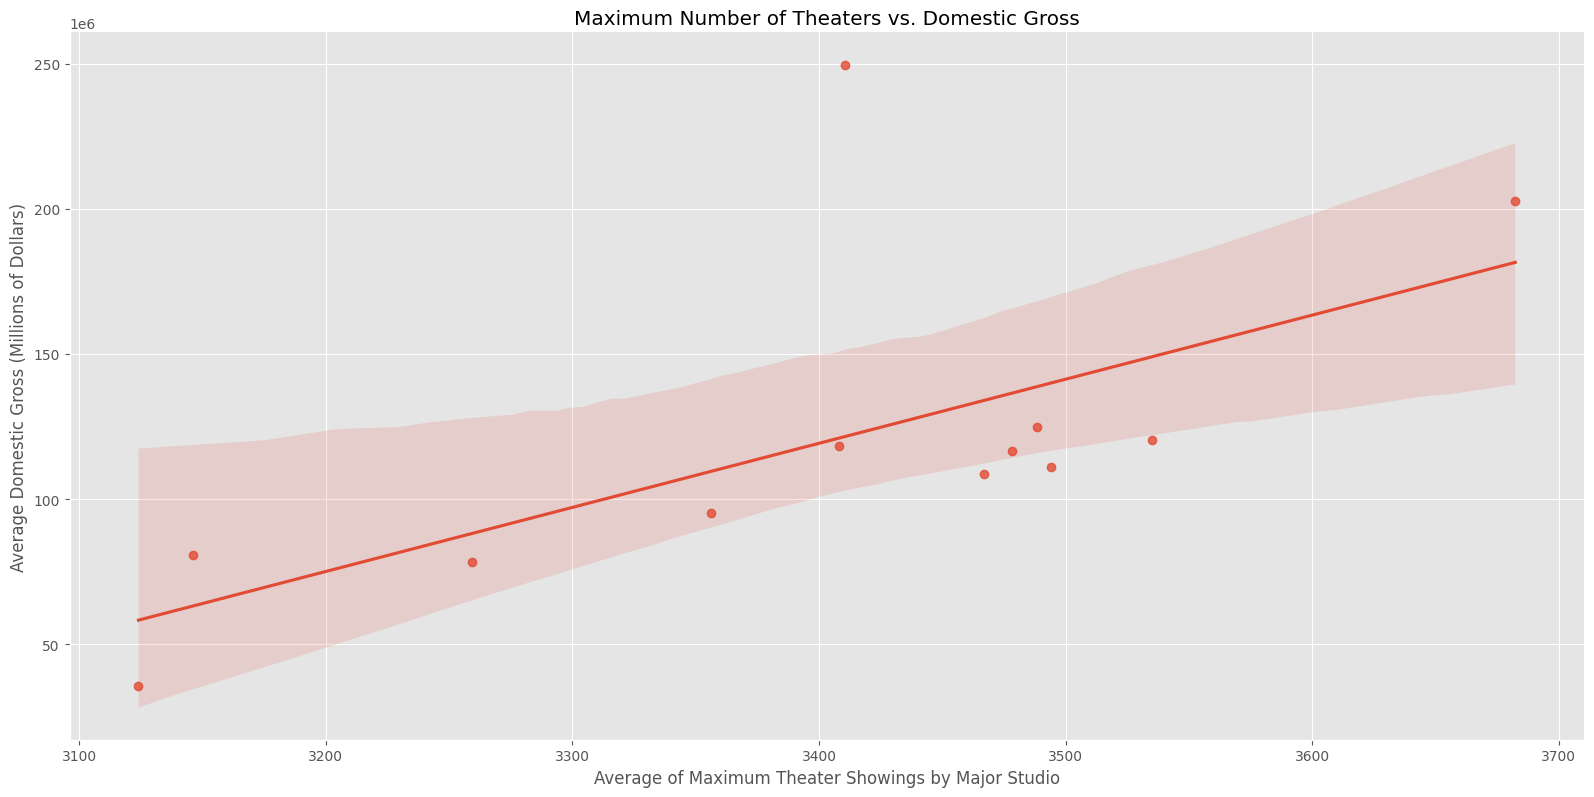

In [1065]:
ax17 = sns.lmplot(x='max_theaters', y='total_dom_gross($)', data=average_theaters, height=8, aspect=2)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xlabel('Average of Maximum Theater Showings by Major Studio' )
plt.ylabel('Average Domestic Gross (Millions of Dollars)' )
plt.title('Maximum Number of Theaters vs. Domestic Gross' )
plt.savefig('TheatersVGross', dpi=300)

The scatter plot shows a positive trend between the average number of theaters and the average domestic gross. The sole outlier is New Line Cinemas due to how few movies they are associated with in our dataframe. Disney is farthest to the right and above the trend line further proving that they should be a strong consideration.

We'll join the theater and awards dataframes so that we can see which studios have the best win rate at the Oscars.

In [1066]:
theaters_df.set_index(['title', 'year'], inplace=True)

In [1067]:
theaters_and_awards = theaters_df.join(awards_df, how='inner', on=['title', 'year'])

In [1068]:
theaters_and_awards.groupby('studio').count()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,22,22,22,22,22,22
DreamWorks Distribution,4,4,4,4,4,4
New Line Cinema,2,2,2,2,2,2
Paramount Pictures,7,7,7,7,7,7
Sony,6,6,6,6,6,6
Twentieth Century Fox,4,4,4,4,4,4
Universal Pictures,6,6,6,6,6,6
Warner Bros.,15,15,15,15,15,15


In [1069]:
theaters_and_awards.groupby('studio').mean()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,3818.73,305217242.45,78797.61,1.36,3.00,0.60
DreamWorks Distribution,3444.25,153223630.75,44447.63,2.00,4.25,0.60
New Line Cinema,3662.50,358408603.00,97814.75,6.50,8.50,0.67
Paramount Pictures,3564.86,140835427.57,38930.82,1.00,3.71,0.45
Sony,3653.67,237842295.67,64720.23,1.17,3.17,0.54
Twentieth Century Fox,3501.75,136874930.25,38404.79,2.25,6.00,0.43
Universal Pictures,3338.83,149344665.00,44970.82,1.33,3.33,0.51
Warner Bros.,3831.60,234055876.80,60023.04,2.67,5.87,0.56


Unfortunately, the joining of the dataframes only left us with 66 common movies. We would prefer to have more data to be more confident in establishing trends. We will consider the average number of theaters and average win rate to make a determination.  Disney is associated with 22 movies in our joined dataframe while Warner Bros. is associated with 15.  Warner. Bros does have a higher average for the number of theaters, however Disney has a noticeable $18,000 advantage in average domestic gross per theater. Disney also has the higher win rate for Oscars at nearly 60%.

**Question 8 Conclusion**: Our Company should research Disney's best practices and try to build off the success of this well established studio.

# Conclusion
While there are many other factors that we could consider in a future analysis, we believe that the following 8 conclusions will lead to a successful business venture as our Company enters the movie industry.

1. I recommend that we budget approximately \$82,250,000 to produce a movie. This should correlate with a profit margin above 80%.

2. I recommend that we focus on the top 6 most profitable genres: Adventure, Action, Comedy, Drama, Sci-Fi, and Animation. A further recommendation is to prioritize Sci-Fi and Animation due to lower competition and higher profit potential.

3. I recommend that we release most movies, especially Animation, during the summer months. Adventure, Drama, and Comedy can also perform well with November releases, but the primary recommendation is to focus on summer.

4. I recommend that we focus our cast and crew search on individuals who consistently achieve a VAR score of at least 1.0. We can confidently conclude that these individuals will elevate the overall production.

5. We should spend at least \$35,465,000 to produce an Oscar-winning movie.

6. I recommend that we take into consideration the rating of the movie based on genre and target audience. For Animation, it is best to stick to a G or PG rating. For other genres, PG-13 is the ideal rating. In terms of runtime, there is little to no correlation with overall profitability.

7. We should aim for a profit margin of 66% and a net profit of slightly over \$50 million per movie to stay competitive with the top studios.

8. We should study Disney's best practices and aim to build upon the success of this well-established studio.
